## 1. 라이브러리 설치

In [3224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from kmodes.kmodes import KModes
from sklearn import preprocessing
%matplotlib inline

In [3225]:
#폰트 설정
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')  

## 2. 데이터 준비

In [3229]:
#크롤링 데이터 준비
#해당 크롤링 데이터는 크롤링을 해 온 후, 일부 널값 처리 및 재현데이터에 있는 모델들을 추가한 데이터이다.
data=pd.read_csv('./data/car_crawling_new_final_3.csv', encoding='cp949')
data

,모델명,가격,외장,연비,연료,엔진형식,배기량,제로백,충전주행거리
0,쌍용 토레스 (1세대),"2,740",SUV (중형),11.2km/l,가솔린,직렬 4기통,1497cc,-,0
1,기아 셀토스 F/L (1세대),"2,160",SUV (소형),12.9km/l,가솔린,직렬 4기통,1598cc,-,0
2,기아 쏘렌토 하이브리드 (4세대),"3,745",SUV (중형),15.3km/l,하이브리드,직렬 4기통,1598cc,-,0
3,폭스바겐 티구안 올스페이스 (2세대),"5,098",SUV (중형),14.5km/l,가솔린,직렬 4기통,1984cc,-,0
4,벤츠 E클래스 세단 F/L (5세대),"6,730",세단 (대형),13.2km/l,가솔린,직렬 4기통,1991cc,7,0
...,...,...,...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),"1,275",밴 (소형),13.0km/l,가솔린,직렬 3기통,998cc,-,0
2026,기아 모하비 F/L (1세대),"4,442",SUV (대형),9.5km/l,디젤,V6 S2,2959cc,-,0
2027,기아 스포티지 (4세대),"2,110",SUV (중형),14.6km/l,디젤,U2 1.7 e-VGT,1685cc,-,0
2028,기아 K7 (2세대),"3,053",세단 (대형),14.6km/l,디젤,2.2 e-VGT,2199cc,-,0


In [3230]:
df=data.copy()

### 3. 전처리

In [3231]:
#제로백, 엔진형식 컬럼은 널값이 많아 사용하지 않으므로 먼저 제거 
df=df.drop(['제로백', '엔진형식'], axis=1) 
df

,모델명,가격,외장,연비,연료,배기량,충전주행거리
0,쌍용 토레스 (1세대),"2,740",SUV (중형),11.2km/l,가솔린,1497cc,0
1,기아 셀토스 F/L (1세대),"2,160",SUV (소형),12.9km/l,가솔린,1598cc,0
2,기아 쏘렌토 하이브리드 (4세대),"3,745",SUV (중형),15.3km/l,하이브리드,1598cc,0
3,폭스바겐 티구안 올스페이스 (2세대),"5,098",SUV (중형),14.5km/l,가솔린,1984cc,0
4,벤츠 E클래스 세단 F/L (5세대),"6,730",세단 (대형),13.2km/l,가솔린,1991cc,0
...,...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),"1,275",밴 (소형),13.0km/l,가솔린,998cc,0
2026,기아 모하비 F/L (1세대),"4,442",SUV (대형),9.5km/l,디젤,2959cc,0
2027,기아 스포티지 (4세대),"2,110",SUV (중형),14.6km/l,디젤,1685cc,0
2028,기아 K7 (2세대),"3,053",세단 (대형),14.6km/l,디젤,2199cc,0



#### 1. 널값 제거

In [3232]:
#numpy의 nan함수를 이용하여 -로 표시된 것들을 널값으로 변경
df[df=='-']=np.nan

In [3233]:
df=df.dropna(axis=0)
df

,모델명,가격,외장,연비,연료,배기량,충전주행거리
0,쌍용 토레스 (1세대),"2,740",SUV (중형),11.2km/l,가솔린,1497cc,0
1,기아 셀토스 F/L (1세대),"2,160",SUV (소형),12.9km/l,가솔린,1598cc,0
2,기아 쏘렌토 하이브리드 (4세대),"3,745",SUV (중형),15.3km/l,하이브리드,1598cc,0
3,폭스바겐 티구안 올스페이스 (2세대),"5,098",SUV (중형),14.5km/l,가솔린,1984cc,0
4,벤츠 E클래스 세단 F/L (5세대),"6,730",세단 (대형),13.2km/l,가솔린,1991cc,0
...,...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),"1,275",밴 (소형),13.0km/l,가솔린,998cc,0
2026,기아 모하비 F/L (1세대),"4,442",SUV (대형),9.5km/l,디젤,2959cc,0
2027,기아 스포티지 (4세대),"2,110",SUV (중형),14.6km/l,디젤,1685cc,0
2028,기아 K7 (2세대),"3,053",세단 (대형),14.6km/l,디젤,2199cc,0


In [3234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 2029
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   모델명     1406 non-null   object
 1   가격      1406 non-null   object
 2   외장      1406 non-null   object
 3   연비      1406 non-null   object
 4   연료      1406 non-null   object
 5   배기량     1406 non-null   object
 6   충전주행거리  1406 non-null   object
dtypes: object(7)
memory usage: 87.9+ KB


In [3235]:
df.isnull().sum() #널값 없음

모델명       0
가격        0
외장        0
연비        0
연료        0
배기량       0
충전주행거리    0
dtype: int64

In [3236]:
df.nunique()

모델명       1389
가격        1099
외장          32
연비         424
연료           7
배기량        209
충전주행거리      65
dtype: int64

- 데이터가 1,406개인데 모델명의 nunique값은 1,389개 
- 즉, 중복값이 있음

#### 2. 모델명 중복값 제거

In [3237]:
#중복값 확인 및 중복값이 있는 경우 처음 나온 값을 keep함
dup = df.duplicated(['모델명'], keep='first')
dup

0       False
1       False
2       False
3       False
4       False
        ...  
2025    False
2026    False
2027    False
2028    False
2029    False
Length: 1406, dtype: bool

In [3238]:
# Dup 컬럼 추가
df_dup = pd.concat([df, dup], axis=1)
df_dup.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup

,모델명,가격,외장,연비,연료,배기량,충전주행거리,Dup
0,쌍용 토레스 (1세대),"2,740",SUV (중형),11.2km/l,가솔린,1497cc,0,False
1,기아 셀토스 F/L (1세대),"2,160",SUV (소형),12.9km/l,가솔린,1598cc,0,False
2,기아 쏘렌토 하이브리드 (4세대),"3,745",SUV (중형),15.3km/l,하이브리드,1598cc,0,False
3,폭스바겐 티구안 올스페이스 (2세대),"5,098",SUV (중형),14.5km/l,가솔린,1984cc,0,False
4,벤츠 E클래스 세단 F/L (5세대),"6,730",세단 (대형),13.2km/l,가솔린,1991cc,0,False
...,...,...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),"1,275",밴 (소형),13.0km/l,가솔린,998cc,0,False
2026,기아 모하비 F/L (1세대),"4,442",SUV (대형),9.5km/l,디젤,2959cc,0,False
2027,기아 스포티지 (4세대),"2,110",SUV (중형),14.6km/l,디젤,1685cc,0,False
2028,기아 K7 (2세대),"3,053",세단 (대형),14.6km/l,디젤,2199cc,0,False


In [3239]:
#중복값 개수 확인
df_dup['Dup'].value_counts()

False    1389
True       17
Name: Dup, dtype: int64

In [3240]:
#중복값인 것만 확인
df_dup[df_dup['Dup']==True]

,모델명,가격,외장,연비,연료,배기량,충전주행거리,Dup
750,벤츠 GLC클래스 쿠페 F/L (1세대),"7,470",SUV (중형),9.2 ~ 12.4km/l,디젤,1950cc,0,True
824,현대 코나 F/L (1세대),"2,144",SUV (소형),13.6 ~ 13.9km/l,가솔린,1999cc,0,True
830,제네시스 G70 F/L (1세대),"4,035",세단 (중형),9.4 ~ 14.9km/l,가솔린,1998cc,0,True
929,벤츠 EQS (1세대),"1억 5,700",세단 (대형),3.8km/kWh,전기,0,478km,True
952,현대 아반떼 N (7세대),"3,212",세단 (중형),10.7km/l,가솔린,1998cc,0,True
961,링컨 노틸러스 F/L (1세대),"6,040",SUV (중형),8.7km/l,가솔린,2694cc,0,True
995,볼보 XC60 리차지 (2세대),"8,590",SUV (중형),11.4km/l,하이브리드,1969cc,0,True
996,볼보 XC90 리차지 (2세대),"1억 1,270",SUV (대형),11.0km/l,하이브리드,1969cc,0,True
1825,롤스로이스 팬텀 (7세대),"64,000",세단 (대형),5.9km/l,가솔린,6749cc,0,True
1868,벤츠 E클래스 세단 F/L (5세대),"6,730",세단 (대형),9.1 ~ 13.2km/l,가솔린,1991cc,0,True


In [3241]:
df_dup[df_dup['모델명']=='제네시스 G70 F/L (1세대)']

,모델명,가격,외장,연비,연료,배기량,충전주행거리,Dup
92,제네시스 G70 F/L (1세대),"4,035",세단 (중형),14.9km/l,가솔린,1998cc,0,False
830,제네시스 G70 F/L (1세대),"4,035",세단 (중형),9.4 ~ 14.9km/l,가솔린,1998cc,0,True


In [3242]:
#중복값 제거, 처음 나오는 값을 keep함
df=df.drop_duplicates(subset='모델명', keep='first')

In [3243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2029
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   모델명     1389 non-null   object
 1   가격      1389 non-null   object
 2   외장      1389 non-null   object
 3   연비      1389 non-null   object
 4   연료      1389 non-null   object
 5   배기량     1389 non-null   object
 6   충전주행거리  1389 non-null   object
dtypes: object(7)
memory usage: 86.8+ KB


In [3244]:
df.nunique()

모델명       1389
가격        1092
외장          32
연비         419
연료           7
배기량        208
충전주행거리      65
dtype: int64

In [3245]:
df[df['모델명']=='제네시스 G70 F/L (1세대)']

,모델명,가격,외장,연비,연료,배기량,충전주행거리
92,제네시스 G70 F/L (1세대),"4,035",세단 (중형),14.9km/l,가솔린,1998cc,0


- 중복값 잘 제거됨

#### 3.연비

In [3246]:
#연비 단위 제거
df['연비']=df['연비'].str.rstrip('km/l') #내연기관차
df['연비']=df['연비'].str.rstrip('km/kWh') #전기차
df['연비']=df['연비'].str.rstrip('km/kg') #수소차

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\1439003654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연비']=df['연비'].str.rstrip('km/l') #내연기관차
C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\1439003654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연비']=df['연비'].str.rstrip('km/kWh') #전기차
C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\1439003654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [3247]:
df['연비'].unique()

array(['11.2', '12.9', '15.3', '14.5', '13.2', '12.4', '10.1', '14.6',
       '13.1', '12.5', '11.9', '13.5', '11.0', '15.6', '11.8', '14.3',
       '9.3', '10.5', '12.0', '20.8', '13.8', '12.3', '8.2', '10.4',
       '6.2', '15.0', '16.2', '8.3', '14.9', '10.6', '16.7', '7.0',
       '11.6', '13.6', '9.5', '3.9', '10.7', '12.2', '5.2', '11.3',
       '18.0', '13.0', '15.8', '11.5', '15.7', '11.7', '4.8', '11.1',
       '7.7', '5.1', '7.8', '13.7', '15.5', '9.0', '4.6', '9.7', '11.4',
       '17.2', '5.6', '12.8', '14.1', '3.8', '6.7', '13.9', '8.7', '8.1',
       '8.6', '17.1', '10.9', '7.2', '10.3', '15.2', '8.5', '6.1', '4.2',
       '9.3km/L', '13.3', '12.7', '15.4', '12.1', '16.0', '5.4', '17.8',
       '12.6', '9.2', '18.9', '8.9', '9.9', '9.4', '15.1', '7.4', '16.5',
       '17.7', '9.8', '17.5', '17.3Km/ℓ', '96.2', '6.3', '5.8', '17.4',
       '16.3', '17.6', '14.4', '14.0', '16.1', '12.2?', '10.2', '7.1',
       '6.6', '7.9', ' 9.4', '9.1', '18.1', '5.9', '6.8', '9.6', '3.5',


In [3248]:
#제거되지 않은 단위 및 문자 추가 제거
df['연비']=df['연비'].str.strip('km/L')
df['연비']=df['연비'].str.strip('Km/ℓ')
df['연비']=df['연비'].str.strip('\xa0')
df['연비']=df['연비'].str.strip('?')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\3028521947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연비']=df['연비'].str.strip('km/L')
C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\3028521947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연비']=df['연비'].str.strip('Km/ℓ')
C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\3028521947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [3249]:
#값이 범위인 데이터의 경우 split하여 뒤의 값을 선택하는 함수
#예를 들어, a ~ b인 경우 b를 선택
def choose(val):
    if val.find('~') != -1:
        return float(val.split(' ~ ')[1])
    else:
        return float(val)

In [3250]:
#함수 적용
df['연비']=df['연비'].apply(choose)

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\471099945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연비']=df['연비'].apply(choose)


In [3251]:
df['연비'].tail(30)

1996     9.6
1998     9.9
1999    13.0
2001     9.1
2002    12.2
2003    11.3
2004    14.6
2006    11.8
2007    12.6
2008    11.8
2009    15.5
2011    11.0
2012    11.0
2013    11.5
2014    15.0
2015     6.2
2016    15.6
2017    14.5
2018    10.1
2019     9.3
2020     9.8
2021     6.8
2022     5.5
2023     9.9
2024     5.3
2025    13.0
2026     9.5
2027    14.6
2028    14.6
2029    17.2
Name: 연비, dtype: float64

In [3252]:
#연료 값에 포함된 공백 제거
df['연료']=df['연료'].str.rstrip(' ')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\456168069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연료']=df['연료'].str.rstrip(' ')


In [3253]:
df['연료'].unique()

array(['가솔린', '하이브리드', 'LPG', '디젤', '전기', '수소'], dtype=object)

In [3254]:
#각 연비의 단위를 제거한 후 1km당 가격으로 통일하기 위해 단위당 가격으로 나눔
#원유 가격은 2022/08/22 기준 금액
df.loc[df['연료']=='수소', '연비']=df['연비']/8800  #국회수소충전소 8800원/kg
df.loc[df['연료']=='전기', '연비']=df['연비']/292.9 #전기차 급속충전 비용 292.9원/kWh
df.loc[(df['연료']=='가솔린') | (df['연료']=='하이브리드'), '연비']=df['연비']/1748.92 #휘발유 전국평균 1748.92원/L
df.loc[df['연료']=='디젤', '연비']=df['연비']/1848.33 #경유 전국평균 1848.33원/L
df.loc[df['연료']=='LPG', '연비']=df['연비']/1088.30  #LPG 전국평균 1088.30원/L

In [3255]:
df.describe()

,연비
count,1389.000000
mean,0.007171
std,0.004674
min,0.001544
25%,0.005032
50%,0.006290
75%,0.008119
max,0.083305


C:\Users\wlsna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


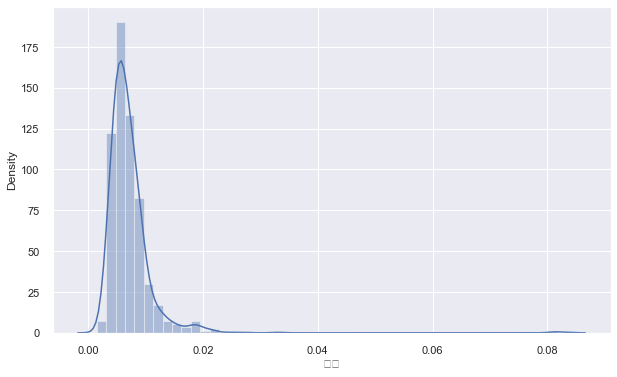

In [3256]:
#분포 확인
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['연비'])
plt.show()

<AxesSubplot:>

C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


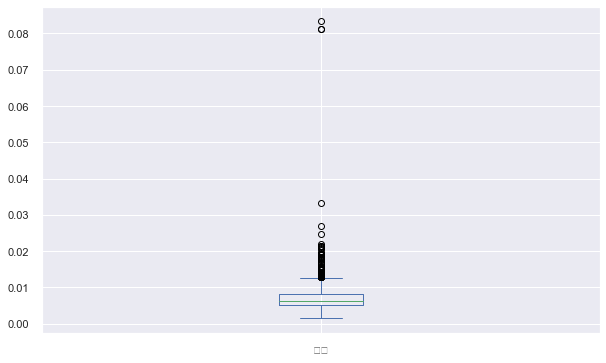

In [3257]:
#값 분포 확인
df['연비'].plot.box()

- 연비 이상치 제거

In [3258]:
#0.07 이상 값 제거하기 위해 인덱스 뽑아내기
dropindex_e=df[df['연비']>0.07].index

In [3259]:
df.drop(dropindex_e, axis=0, inplace=True)

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\571871855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(dropindex_e, axis=0, inplace=True)


<AxesSubplot:>

C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


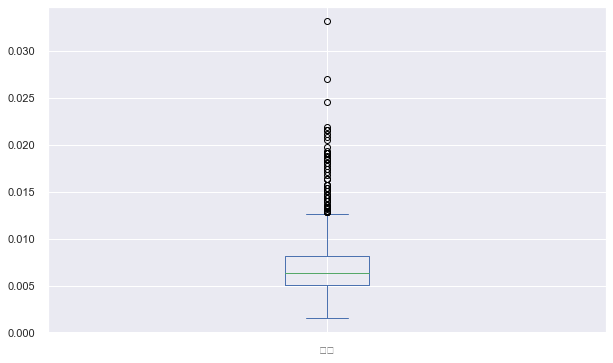

In [3260]:
#이상치 제거됨 확인
df['연비'].plot.box()

In [3261]:
df['연비'].describe()

count    1386.000000
mean        0.007009
std         0.003123
min         0.001544
25%         0.005032
50%         0.006290
75%         0.008119
max         0.033117
Name: 연비, dtype: float64

#### 4. 가격

표기 방식 (예)
- 7000 -> 7,000만원
- 10000 -> 1억 

In [3262]:
#가격 값의 문자 제거
df['가격']=df['가격'].replace('억', '', regex=True)
df['가격']=df['가격'].str.replace(' ', '')
df['가격']=df['가격'].str.replace(',', '')
df['가격']=df['가격'].str.rstrip('?')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2638747344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가격']=df['가격'].replace('억', '', regex=True)
C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2638747344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가격']=df['가격'].str.replace(' ', '')
C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2638747344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [3263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 2029
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     1386 non-null   object 
 1   가격      1386 non-null   object 
 2   외장      1386 non-null   object 
 3   연비      1386 non-null   float64
 4   연료      1386 non-null   object 
 5   배기량     1386 non-null   object 
 6   충전주행거리  1386 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.6+ KB


In [3264]:
#int로 데이터 타입 변경
df['가격']=df['가격'].astype('int')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\4252154455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가격']=df['가격'].astype('int')


In [3265]:
df['가격'].describe()

count      1386.000000
mean       9400.394661
std       14838.671726
min         623.000000
25%        3560.000000
50%        5550.000000
75%       10722.500000
max      355000.000000
Name: 가격, dtype: float64

In [3266]:
#1억 이상 341개
df[df['가격']>10000] 

,모델명,가격,외장,연비,연료,배기량,충전주행거리
19,BMW X7 F/L (1세대),13030,SUV (대형),0.006004,가솔린,2998cc,0
20,벤츠 S클래스 세단 (7세대),14060,세단 (대형),0.006492,디젤,2925cc,0
37,캐딜락 에스컬레이드 (5세대),15357,SUV (대형),0.004002,가솔린,6162cc,0
42,BMW X5 (4세대),11360,SUV (중형),0.006118,가솔린,2998cc,0
51,볼보 XC90 리차지 (2세대),11270,SUV (대형),0.006290,하이브리드,1969cc,0
...,...,...,...,...,...,...,...
1991,BMW iX 플로우 (콘셉트),14630,SUV (대형),0.012291,전기,0,447 km
1992,BMW 8시리즈 컨버터블 F/L (2세대),13570,컨버터블 (대형),0.006290,가솔린,2998cc,0
2015,마세라티 그란투리스모 (1세대),21650,쿠페 (중형),0.003545,가솔린,4691cc,0
2018,랜드로버 레인지로버 (5세대),19687,SUV (대형),0.005775,가솔린,4395cc,0


<AxesSubplot:>

C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


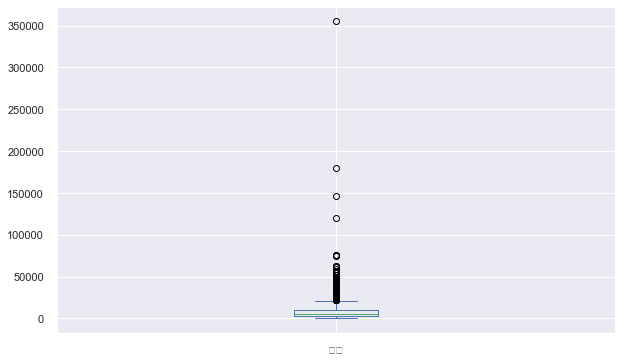

In [3267]:
#값 분포 확인
df['가격'].plot.box()

- 가격 이상치 제거

In [3268]:
#100000 이상 제거
dropindex_p=df[df['가격']>100000].index

In [3269]:
df.drop(dropindex_p, axis=0, inplace=True)

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2509903286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(dropindex_p, axis=0, inplace=True)


In [3270]:
df['가격'].describe()

count     1382.000000
mean      8847.631693
std       9511.314201
min        623.000000
25%       3560.000000
50%       5535.500000
75%      10565.000000
max      76000.000000
Name: 가격, dtype: float64

In [3271]:
#가격 로그 변환
df['가격_log']=np.log(df['가격']+1)

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\720231353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가격_log']=np.log(df['가격']+1)


In [3272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 2029
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     1382 non-null   object 
 1   가격      1382 non-null   int32  
 2   외장      1382 non-null   object 
 3   연비      1382 non-null   float64
 4   연료      1382 non-null   object 
 5   배기량     1382 non-null   object 
 6   충전주행거리  1382 non-null   object 
 7   가격_log  1382 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 91.8+ KB


In [3273]:
df

,모델명,가격,외장,연비,연료,배기량,충전주행거리,가격_log
0,쌍용 토레스 (1세대),2740,SUV (중형),0.006404,가솔린,1497cc,0,7.916078
1,기아 셀토스 F/L (1세대),2160,SUV (소형),0.007376,가솔린,1598cc,0,7.678326
2,기아 쏘렌토 하이브리드 (4세대),3745,SUV (중형),0.008748,하이브리드,1598cc,0,8.228444
3,폭스바겐 티구안 올스페이스 (2세대),5098,SUV (중형),0.008291,가솔린,1984cc,0,8.536800
4,벤츠 E클래스 세단 F/L (5세대),6730,세단 (대형),0.007548,가솔린,1991cc,0,8.814479
...,...,...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),1275,밴 (소형),0.007433,가솔린,998cc,0,7.151485
2026,기아 모하비 F/L (1세대),4442,SUV (대형),0.005140,디젤,2959cc,0,8.399085
2027,기아 스포티지 (4세대),2110,SUV (중형),0.007899,디젤,1685cc,0,7.654917
2028,기아 K7 (2세대),3053,세단 (대형),0.007899,디젤,2199cc,0,8.024207


#### 5. 배기량

In [3274]:
#배기량 단위 및 문자 제거
df['배기량']=df['배기량'].str.rstrip('cc')
df['배기량']=df['배기량'].str.replace(',', '')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2060432534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['배기량']=df['배기량'].str.rstrip('cc')
C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2060432534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['배기량']=df['배기량'].str.replace(',', '')


In [3275]:
#데이터타입 int로 변환
df['배기량']=df['배기량'].astype('int')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2107061241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['배기량']=df['배기량'].astype('int')


In [3276]:
df['배기량'].describe()

count    1382.000000
mean     2555.962373
std      1316.796254
min         0.000000
25%      1962.000000
50%      1999.000000
75%      3092.000000
max      6752.000000
Name: 배기량, dtype: float64

<AxesSubplot:>

C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


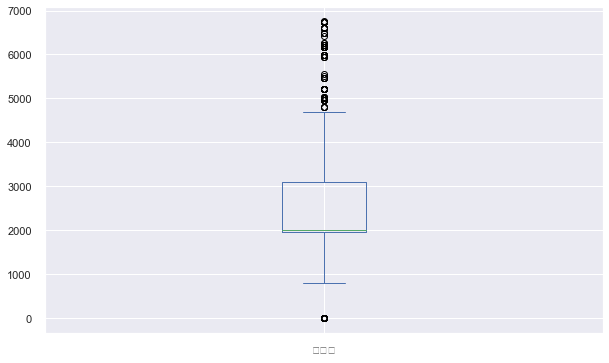

In [3277]:
#값 분포 확인
df['배기량'].plot.box()

In [3278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 2029
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     1382 non-null   object 
 1   가격      1382 non-null   int32  
 2   외장      1382 non-null   object 
 3   연비      1382 non-null   float64
 4   연료      1382 non-null   object 
 5   배기량     1382 non-null   int32  
 6   충전주행거리  1382 non-null   object 
 7   가격_log  1382 non-null   float64
dtypes: float64(2), int32(2), object(4)
memory usage: 86.4+ KB


In [3279]:
df.describe()

,가격,연비,배기량,가격_log
count,1382.000000,1382.000000,1382.000000,1382.000000
mean,8847.631693,0.007017,2555.962373,8.709892
std,9511.314201,0.003123,1316.796254,0.839004
min,623.000000,0.001544,0.000000,6.436150
25%,3560.000000,0.005032,1962.000000,8.177797
50%,5535.500000,0.006290,1999.000000,8.619117
75%,10565.000000,0.008119,3092.000000,9.265396
max,76000.000000,0.033117,6752.000000,11.238502


#### 6. 충전주행거리
- 전기차나 수소차의 경우 충전주행거리가 있지만 내연기관차는 0임

In [3280]:
#단위 제거
df['충전주행거리']=df['충전주행거리'].str.strip('km')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2918457992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['충전주행거리']=df['충전주행거리'].str.strip('km')


In [3281]:
#데이터 타입 int로 변환
df['충전주행거리']=df['충전주행거리'].astype('int')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\2335814554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['충전주행거리']=df['충전주행거리'].astype('int')


In [3282]:
df['충전주행거리'].describe()

count    1382.000000
mean       16.806802
std        79.045296
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       652.000000
Name: 충전주행거리, dtype: float64

In [3283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 2029
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   모델명     1382 non-null   object 
 1   가격      1382 non-null   int32  
 2   외장      1382 non-null   object 
 3   연비      1382 non-null   float64
 4   연료      1382 non-null   object 
 5   배기량     1382 non-null   int32  
 6   충전주행거리  1382 non-null   int32  
 7   가격_log  1382 non-null   float64
dtypes: float64(2), int32(3), object(3)
memory usage: 81.0+ KB


#### 7. 프리미엄 브랜드 컬럼 추가
- 프리미엄 브랜드를 선호하는 사람들에게 프리미엄 브랜드의 차량을 추천해주기 위해 따로 컬럼을 설정함
- 프리미엄 브랜드는 ['제네시스', 'BMW', '아우디', '벤츠', '포르쉐', '테슬라', '카딜락', '링컨', '볼보', '렉서스', '랜드로버', '마세라티', '재규어', '인피니티', '어큐라']로 정의함


In [3284]:
# 모델명에서 제조회사 이름 분리
def split_brand(name):
    return name.split(' ')[0]

In [3285]:
df['제조 회사']=df['모델명'].apply(split_brand)

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\244182365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['제조 회사']=df['모델명'].apply(split_brand)


In [3286]:
df

,모델명,가격,외장,연비,연료,배기량,충전주행거리,가격_log,제조 회사
0,쌍용 토레스 (1세대),2740,SUV (중형),0.006404,가솔린,1497,0,7.916078,쌍용
1,기아 셀토스 F/L (1세대),2160,SUV (소형),0.007376,가솔린,1598,0,7.678326,기아
2,기아 쏘렌토 하이브리드 (4세대),3745,SUV (중형),0.008748,하이브리드,1598,0,8.228444,기아
3,폭스바겐 티구안 올스페이스 (2세대),5098,SUV (중형),0.008291,가솔린,1984,0,8.536800,폭스바겐
4,벤츠 E클래스 세단 F/L (5세대),6730,세단 (대형),0.007548,가솔린,1991,0,8.814479,벤츠
...,...,...,...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),1275,밴 (소형),0.007433,가솔린,998,0,7.151485,기아
2026,기아 모하비 F/L (1세대),4442,SUV (대형),0.005140,디젤,2959,0,8.399085,기아
2027,기아 스포티지 (4세대),2110,SUV (중형),0.007899,디젤,1685,0,7.654917,기아
2028,기아 K7 (2세대),3053,세단 (대형),0.007899,디젤,2199,0,8.024207,기아


In [3287]:
#프리미엄 브랜드 컬럼 생성
#프리미엄 브랜드에 해당하면 1을, 그렇지 않으면 0을 부여
premium=[]
premium_brand=['제네시스', 'BMW', '아우디', '벤츠', '포르쉐', '테슬라', '카딜락', '링컨', '볼보', '렉서스', '랜드로버', '마세라티', '재규어', '인피니티', '어큐라']

for i in range(len(df.index)):
    if df['제조 회사'].iloc[i] in premium_brand: 
        premium.append(1)
    else:
        premium.append(0)
df['프리미엄 브랜드']=premium        

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\1951684847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['프리미엄 브랜드']=premium


In [3288]:
df

,모델명,가격,외장,연비,연료,배기량,충전주행거리,가격_log,제조 회사,프리미엄 브랜드
0,쌍용 토레스 (1세대),2740,SUV (중형),0.006404,가솔린,1497,0,7.916078,쌍용,0
1,기아 셀토스 F/L (1세대),2160,SUV (소형),0.007376,가솔린,1598,0,7.678326,기아,0
2,기아 쏘렌토 하이브리드 (4세대),3745,SUV (중형),0.008748,하이브리드,1598,0,8.228444,기아,0
3,폭스바겐 티구안 올스페이스 (2세대),5098,SUV (중형),0.008291,가솔린,1984,0,8.536800,폭스바겐,0
4,벤츠 E클래스 세단 F/L (5세대),6730,세단 (대형),0.007548,가솔린,1991,0,8.814479,벤츠,1
...,...,...,...,...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),1275,밴 (소형),0.007433,가솔린,998,0,7.151485,기아,0
2026,기아 모하비 F/L (1세대),4442,SUV (대형),0.005140,디젤,2959,0,8.399085,기아,0
2027,기아 스포티지 (4세대),2110,SUV (중형),0.007899,디젤,1685,0,7.654917,기아,0
2028,기아 K7 (2세대),3053,세단 (대형),0.007899,디젤,2199,0,8.024207,기아,0


In [3289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 2029
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   모델명       1382 non-null   object 
 1   가격        1382 non-null   int32  
 2   외장        1382 non-null   object 
 3   연비        1382 non-null   float64
 4   연료        1382 non-null   object 
 5   배기량       1382 non-null   int32  
 6   충전주행거리    1382 non-null   int32  
 7   가격_log    1382 non-null   float64
 8   제조 회사     1382 non-null   object 
 9   프리미엄 브랜드  1382 non-null   int64  
dtypes: float64(2), int32(3), int64(1), object(4)
memory usage: 102.6+ KB


In [3290]:
#카테고리로 데이터타입 변경
df['프리미엄 브랜드']=df['프리미엄 브랜드'].astype('category')

C:\Users\wlsna\AppData\Local\Temp\ipykernel_8488\3311737732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['프리미엄 브랜드']=df['프리미엄 브랜드'].astype('category')


In [3291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 2029
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   모델명       1382 non-null   object  
 1   가격        1382 non-null   int32   
 2   외장        1382 non-null   object  
 3   연비        1382 non-null   float64 
 4   연료        1382 non-null   object  
 5   배기량       1382 non-null   int32   
 6   충전주행거리    1382 non-null   int32   
 7   가격_log    1382 non-null   float64 
 8   제조 회사     1382 non-null   object  
 9   프리미엄 브랜드  1382 non-null   category
dtypes: category(1), float64(2), int32(3), object(4)
memory usage: 93.2+ KB


In [3292]:
df1=df.copy()

## 4.모델 학습 : K-Prototypes Clustering

In [3293]:
df_kp=df.copy()

In [3294]:
from kmodes.kmodes import KModes

In [3295]:
df_kp.describe() #수치형 변수의 산술통계 확인

,가격,연비,배기량,충전주행거리,가격_log
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,8847.631693,0.007017,2555.962373,16.806802,8.709892
std,9511.314201,0.003123,1316.796254,79.045296,0.839004
min,623.000000,0.001544,0.000000,0.000000,6.436150
25%,3560.000000,0.005032,1962.000000,0.000000,8.177797
50%,5535.500000,0.006290,1999.000000,0.000000,8.619117
75%,10565.000000,0.008119,3092.000000,0.000000,9.265396
max,76000.000000,0.033117,6752.000000,652.000000,11.238502


**4.1 스케일링**
- minmaxscaler 사용

In [3296]:
#수치형 변수와 범주형 변수 분리
numerical_col=df_kp[['가격_log', '연비', '배기량', '충전주행거리']]
categorical_col=df_kp.drop(numerical_col, axis=1)

In [3297]:
scale=MinMaxScaler()

In [3298]:
#minmaxscaler 적용
scaled_numerical_col=scale.fit_transform(numerical_col)
scaled_numerical_col=pd.DataFrame(scaled_numerical_col, columns=['scaled_가격log', 'scaled_연비', 'scaled_배기량', 'scaled_충전주행거리'])

In [3299]:
scaled_numerical_col

,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리
0,0.308167,0.153932,0.221712,0.0
1,0.258660,0.184718,0.236671,0.0
2,0.373212,0.228182,0.236671,0.0
3,0.437421,0.213694,0.293839,0.0
4,0.495243,0.190151,0.294876,0.0
...,...,...,...,...
1377,0.148955,0.186529,0.147808,0.0
1378,0.408745,0.113893,0.438241,0.0
1379,0.253785,0.201284,0.249556,0.0
1380,0.330683,0.201284,0.325681,0.0


In [3300]:
categorical_col

,모델명,가격,외장,연료,제조 회사,프리미엄 브랜드
0,쌍용 토레스 (1세대),2740,SUV (중형),가솔린,쌍용,0
1,기아 셀토스 F/L (1세대),2160,SUV (소형),가솔린,기아,0
2,기아 쏘렌토 하이브리드 (4세대),3745,SUV (중형),하이브리드,기아,0
3,폭스바겐 티구안 올스페이스 (2세대),5098,SUV (중형),가솔린,폭스바겐,0
4,벤츠 E클래스 세단 F/L (5세대),6730,세단 (대형),가솔린,벤츠,1
...,...,...,...,...,...,...
2025,기아 레이 F/L (1세대),1275,밴 (소형),가솔린,기아,0
2026,기아 모하비 F/L (1세대),4442,SUV (대형),디젤,기아,0
2027,기아 스포티지 (4세대),2110,SUV (중형),디젤,기아,0
2028,기아 K7 (2세대),3053,세단 (대형),디젤,기아,0


In [3301]:
#인덱스 번호 재정렬
categorical_col.reset_index(drop=True, inplace=True)

In [3302]:
#스케일링한 수치형 변수와 데이터 합침
df_kp=pd.concat([categorical_col, scaled_numerical_col], axis=1)

In [3303]:
df_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   모델명            1382 non-null   object  
 1   가격             1382 non-null   int32   
 2   외장             1382 non-null   object  
 3   연료             1382 non-null   object  
 4   제조 회사          1382 non-null   object  
 5   프리미엄 브랜드       1382 non-null   category
 6   scaled_가격log   1382 non-null   float64 
 7   scaled_연비      1382 non-null   float64 
 8   scaled_배기량     1382 non-null   float64 
 9   scaled_충전주행거리  1382 non-null   float64 
dtypes: category(1), float64(4), int32(1), object(4)
memory usage: 93.4+ KB


In [3304]:
df_kp.describe()

,가격,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,8847.631693,0.473464,0.173353,0.378549,0.025777
std,9511.314201,0.174707,0.098915,0.195023,0.121235
min,623.000000,0.000000,0.000000,0.000000,0.000000
25%,3560.000000,0.362665,0.110469,0.290581,0.000000
50%,5535.500000,0.454562,0.150310,0.296060,0.000000
75%,10565.000000,0.589138,0.208261,0.457938,0.000000
max,76000.000000,1.000000,1.000000,1.000000,1.000000


In [3305]:
#클러스터링에 필요한 컬럼으로만 따로 데이터 프레임 만듦
df_kp_x=df_kp[['외장', '연료', 'scaled_가격log', 'scaled_연비', 'scaled_배기량', 'scaled_충전주행거리', '프리미엄 브랜드']]
df_kp_x

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드
0,SUV (중형),가솔린,0.308167,0.153932,0.221712,0.0,0
1,SUV (소형),가솔린,0.258660,0.184718,0.236671,0.0,0
2,SUV (중형),하이브리드,0.373212,0.228182,0.236671,0.0,0
3,SUV (중형),가솔린,0.437421,0.213694,0.293839,0.0,0
4,세단 (대형),가솔린,0.495243,0.190151,0.294876,0.0,1
...,...,...,...,...,...,...,...
1377,밴 (소형),가솔린,0.148955,0.186529,0.147808,0.0,0
1378,SUV (대형),디젤,0.408745,0.113893,0.438241,0.0,0
1379,SUV (중형),디젤,0.253785,0.201284,0.249556,0.0,0
1380,세단 (대형),디젤,0.330683,0.201284,0.325681,0.0,0


In [3306]:
#라벨 인코딩
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_kp_x = df_kp_x.apply(le.fit_transform)
df_kp_x.head()

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드
0,3,1,182,98,23,0,0
1,2,1,115,130,33,0,0
2,3,5,313,181,33,0,0
3,3,1,464,165,50,0,0
4,9,1,601,136,52,0,1


**1. init='random', k=3** 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 92, ncost: 41601742.12846373
Run: 1, iteration: 2/100, moves: 13, ncost: 41573998.5103161
Run: 1, iteration: 3/100, moves: 2, ncost: 41573209.84943766
Run:

Run: 3, iteration: 13/100, moves: 5, ncost: 15925464.540869154
Run: 3, iteration: 14/100, moves: 3, ncost: 15924783.405474141
Run: 3, iteration: 15/100, moves: 2, ncost: 15924492.848571533
Run: 3, iteration: 16/100, moves: 0, ncost: 15924492.848571533
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 180, ncost: 15913749.766759513
Run: 4, iteration: 2/100, moves: 39, ncost: 15852564.676380321
Run: 4, iteration: 3/100, moves: 10, ncost: 15846942.112066608
Run: 4, iteration: 4/100, moves: 8, ncost: 15843411.050419336
Run: 4, iteration: 5/100, moves: 7, ncost: 15836734.908411646
Run: 4, iteration: 6/100, moves: 6, ncost: 15833336.257831065
Run: 4, iteration: 7/100, moves: 0, ncost: 15833336.257831065
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 334, ncost: 20853481.888989
Run: 5, iteration: 2/100, moves: 199, ncost: 18374754.415094048
Run: 5, iteration: 3/100,

Run: 3, iteration: 7/100, moves: 19, ncost: 11027443.258286068
Run: 3, iteration: 8/100, moves: 6, ncost: 11025942.506679067
Run: 3, iteration: 9/100, moves: 7, ncost: 11022864.186929656
Run: 3, iteration: 10/100, moves: 2, ncost: 11022551.460559582
Run: 3, iteration: 11/100, moves: 3, ncost: 11021861.541730622
Run: 3, iteration: 12/100, moves: 1, ncost: 11021765.371778132
Run: 3, iteration: 13/100, moves: 0, ncost: 11021765.371778132
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 170, ncost: 12910108.741122
Run: 4, iteration: 2/100, moves: 39, ncost: 12840018.037000965
Run: 4, iteration: 3/100, moves: 48, ncost: 12705894.471294884
Run: 4, iteration: 4/100, moves: 52, ncost: 12531862.073887395
Run: 4, iteration: 5/100, moves: 81, ncost: 12094888.883734832
Run: 4, iteration: 6/100, moves: 108, ncost: 11636465.48616694
Run: 4, iteration: 7/100, moves: 70, ncost: 11404785.832421513
Run: 4, iteration: 8/100, moves: 57, ncost

Run: 1, iteration: 11/100, moves: 0, ncost: 8765931.458664415
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 288, ncost: 9468871.619554235
Run: 2, iteration: 2/100, moves: 137, ncost: 9125431.021336796
Run: 2, iteration: 3/100, moves: 69, ncost: 9011638.59412562
Run: 2, iteration: 4/100, moves: 46, ncost: 8959185.176708316
Run: 2, iteration: 5/100, moves: 26, ncost: 8946049.19504963
Run: 2, iteration: 6/100, moves: 14, ncost: 8941458.816831136
Run: 2, iteration: 7/100, moves: 22, ncost: 8926441.346941354
Run: 2, iteration: 8/100, moves: 16, ncost: 8915826.92299405
Run: 2, iteration: 9/100, moves: 9, ncost: 8911814.133787788
Run: 2, iteration: 10/100, moves: 2, ncost: 8911240.35152448
Run: 2, iteration: 11/100, moves: 0, ncost: 8911240.35152448
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 424, ncost: 9796457.658240434
Run: 3, iteration: 2/100, moves: 167,

Run: 5, iteration: 5/100, moves: 51, ncost: 8211580.315100936
Run: 5, iteration: 6/100, moves: 37, ncost: 8157682.452924049
Run: 5, iteration: 7/100, moves: 39, ncost: 8097843.451117373
Run: 5, iteration: 8/100, moves: 36, ncost: 8066873.823937201
Run: 5, iteration: 9/100, moves: 27, ncost: 8052260.031180112
Run: 5, iteration: 10/100, moves: 15, ncost: 8047677.376614531
Run: 5, iteration: 11/100, moves: 2, ncost: 8047541.063546648
Run: 5, iteration: 12/100, moves: 0, ncost: 8047541.063546648
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 240, ncost: 7951467.183102987
Run: 1, iteration: 2/100, moves: 123, ncost: 7523011.752131035
Run: 1, iteration: 3/100, moves: 111, ncost: 7132746.174359049
Run: 1, iteration: 4/100, moves: 64, ncost: 6996560.481338074
Run: 1, iteration: 5/100, moves: 51, ncost: 6933798.4430564465
Run: 1, iteration: 6/100, moves: 36, ncost: 6903626.980241085
Run: 1, iteration: 7/100,

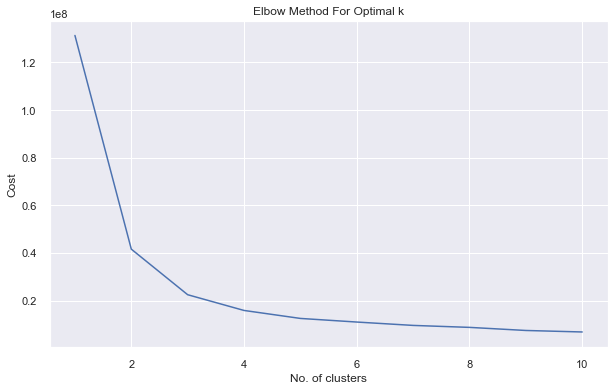

In [3307]:
#elbow method -> 최적의 k값 찾기
cost = []
K = range(1,11)
for num_clusters in list(K):
    kp= KPrototypes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1, random_state=42)
    kp.fit_predict(df_kp_x, categorical=[0,1,6])
    cost.append(kp.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [3308]:
#모델 학습
kp_random = KPrototypes(n_clusters=3, init = "random", n_init = 5, verbose=1, random_state=42)
clusters_kp_random = kp_random.fit_predict(df_kp_x, categorical=[0,1,6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 222, ncost: 25109300.69813056
Run: 1, iteration: 2/100, moves: 150, ncost: 23090320.136000272
Run: 1, iteration: 3/100, moves: 75, ncost: 22585860.505369622
Run: 1, iteration: 4/100, moves: 35, ncost: 22496213.903172355
Run: 1, iteration: 5/100, moves: 17, ncost: 22472361.768669188
Run: 1, iteration: 6/100, moves: 17, ncost: 22447223.101264734
Run: 1, iteration: 7/100, moves: 6, ncost: 22443200.842390135
Run: 1, iteration: 8/100, moves: 1, ncost: 22442733.16387941
Run: 1, iteration: 9/100, moves: 1, ncost: 22442507.355093047
Run: 1, iteration: 10/100, moves: 0, ncost: 22442507.355093047
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 137, ncost: 23242921.796314977
Run: 2, iteration: 2/100, moves: 78, ncost: 22639298.131561037
Run: 2, iteration: 3/100, moves: 39, ncost: 22509934.047600217
Run: 2, iteration: 4/10

In [3309]:
#cost 확인
kp_random.cost_

22439489.00445194

In [3310]:
df_kp_x

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드
0,3,1,182,98,23,0,0
1,2,1,115,130,33,0,0
2,3,5,313,181,33,0,0
3,3,1,464,165,50,0,0
4,9,1,601,136,52,0,1
...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0
1378,1,2,402,53,108,0,0
1379,3,2,111,149,36,0,0
1380,9,2,227,149,65,0,0


In [3311]:
#데이터프레임에 레이블 컬럼 추가
df_kp_x.insert(7, 'clusters', clusters_kp_random)

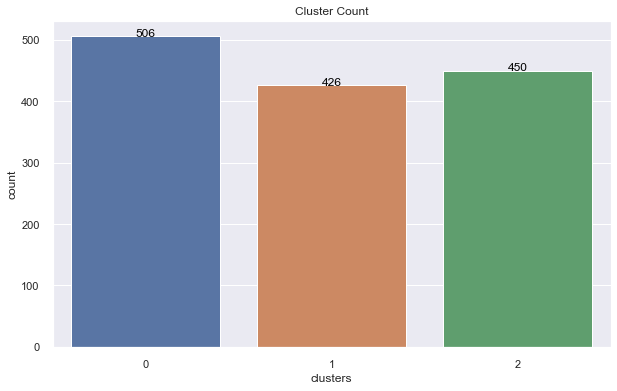

In [3312]:
#레이블별 count
ax=sns.countplot(x=df_kp_x['clusters'])
for index, row in pd.DataFrame(df_kp_x['clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])), color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [3313]:
df_kp_x

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드,clusters
0,3,1,182,98,23,0,0,2
1,2,1,115,130,33,0,0,2
2,3,5,313,181,33,0,0,2
3,3,1,464,165,50,0,0,0
4,9,1,601,136,52,0,1,0
...,...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0,2
1378,1,2,402,53,108,0,0,0
1379,3,2,111,149,36,0,0,2
1380,9,2,227,149,65,0,0,2


In [3314]:
#중심점 확인
kp_random.cluster_centroids_

array([[5.17274704e+02, 1.12310277e+02, 7.12470356e+01, 1.90316206e+00,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.81309859e+02, 5.72394366e+01, 1.32255869e+02, 1.70187793e+00,
        9.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.89942222e+02, 1.60782222e+02, 4.27244444e+01, 4.15555556e-01,
        1.20000000e+01, 1.00000000e+00, 0.00000000e+00]])

In [3315]:
#2차원 평면에 클러스터링을 표현하기 위해 차원 축소 : t-SNE 임베딩 사용
#2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(df_kp_x)

# numpy array -> DataFrame 변환
df_tsne = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])

C:\Users\wlsna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\wlsna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [3316]:
df_tsne

,component 0,component 1
0,40.347980,-1.165076
1,43.789436,7.162933
2,22.211771,-5.874952
3,2.396513,-12.120373
4,-13.676265,-14.309063
...,...,...
1377,48.078732,18.191704
1378,5.264980,-35.795856
1379,42.978790,9.025388
1380,30.949301,-2.917731


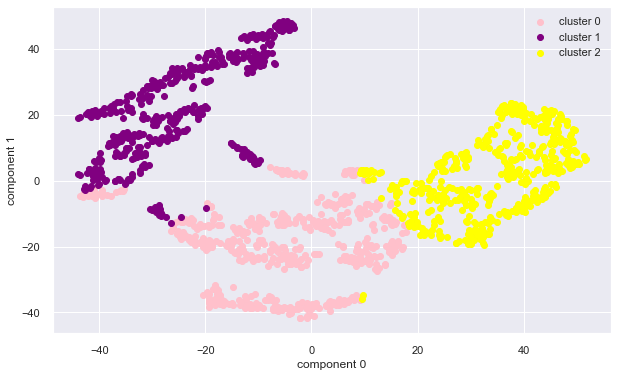

In [3317]:
# class 정보 불러오기 
df_tsne['class']=df_kp_x['clusters']

# class별 분리
df_tsne0 = df_tsne[df_tsne['class'] == 0]
df_tsne1 = df_tsne[df_tsne['class'] == 1]
df_tsne2 = df_tsne[df_tsne['class'] == 2]

# class별 시각화
plt.scatter(df_tsne0['component 0'], df_tsne0['component 1'], color = 'pink', label = 'cluster 0')
plt.scatter(df_tsne1['component 0'], df_tsne1['component 1'], color = 'purple', label = 'cluster 1')
plt.scatter(df_tsne2['component 0'], df_tsne2['component 1'], color = 'yellow', label = 'cluster 2')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [3318]:
df_kp_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   외장             1382 non-null   int32 
 1   연료             1382 non-null   int32 
 2   scaled_가격log   1382 non-null   int64 
 3   scaled_연비      1382 non-null   int64 
 4   scaled_배기량     1382 non-null   int64 
 5   scaled_충전주행거리  1382 non-null   int64 
 6   프리미엄 브랜드       1382 non-null   int64 
 7   clusters       1382 non-null   uint16
dtypes: int32(2), int64(5), uint16(1)
memory usage: 67.6 KB


In [3319]:
#카테고리로 데이터타입 변환
df_kp_x['clusters']=df_kp_x['clusters'].astype('category')

C:\Users\wlsna\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\wlsna\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\wlsna\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\wlsna\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\wlsna\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\wlsna\anaconda3\lib\site-packages\seaborn

C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wlsna\anaconda3

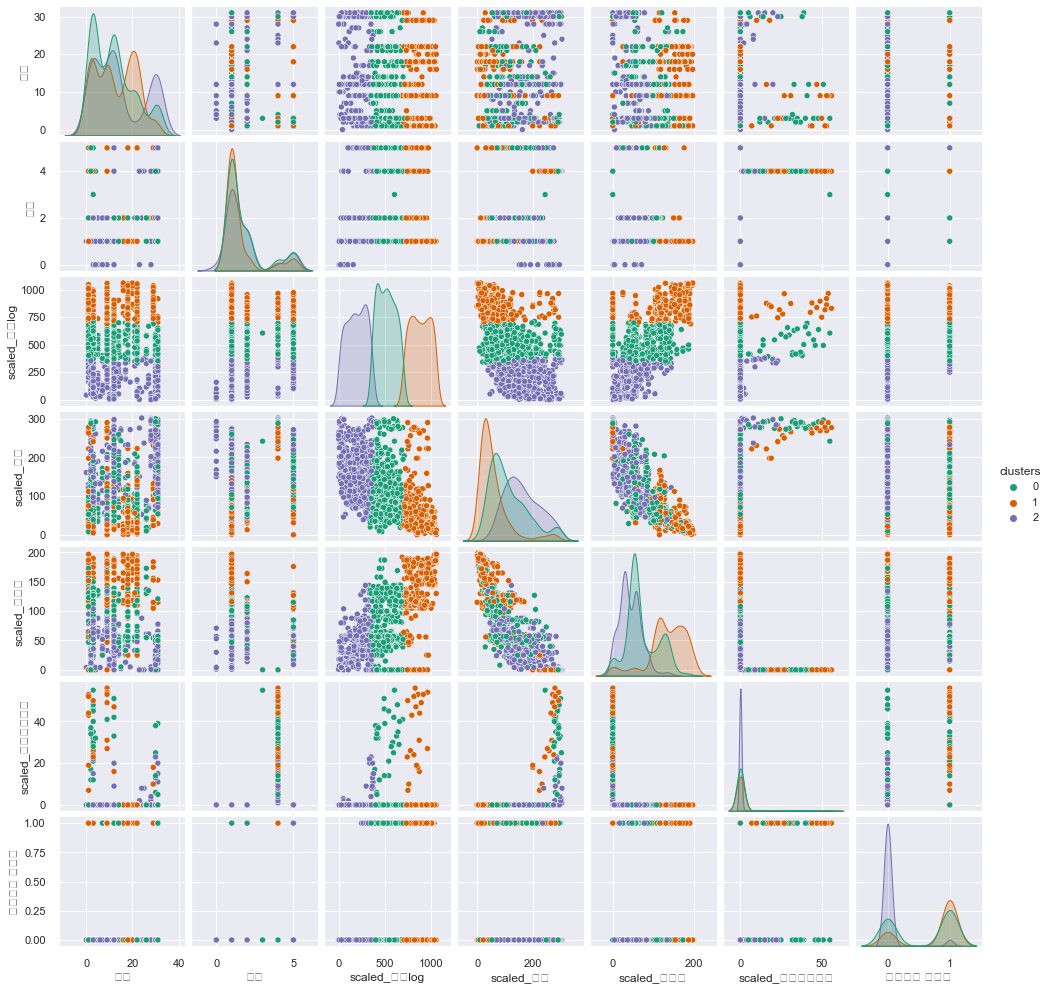

In [3320]:
#변수별 시각화
sns.pairplot(df_kp_x, height=2.0, hue='clusters', palette='Dark2')
plt.show()

C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


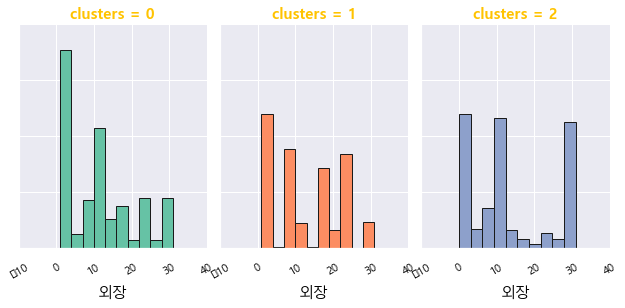

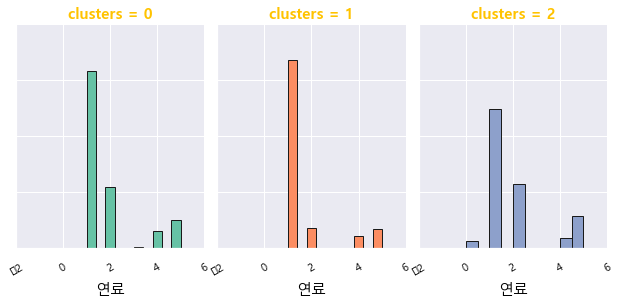

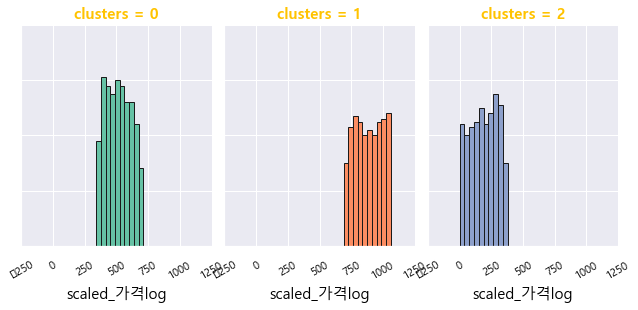

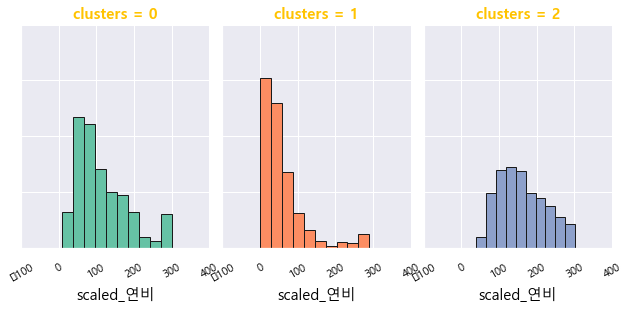

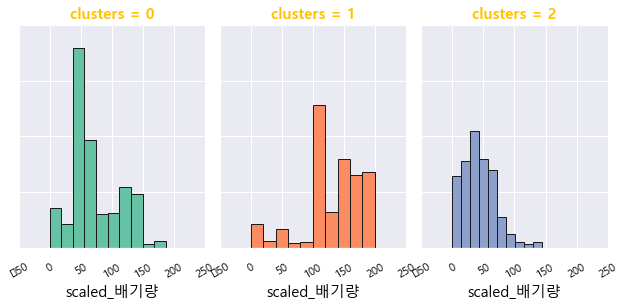

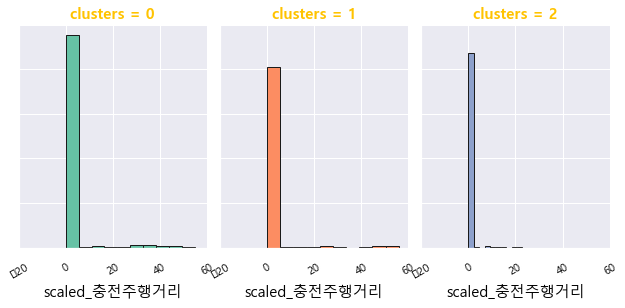

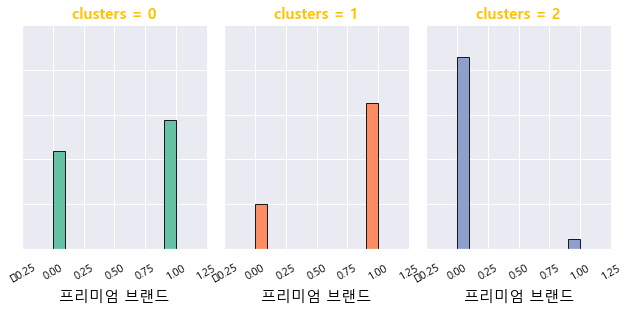

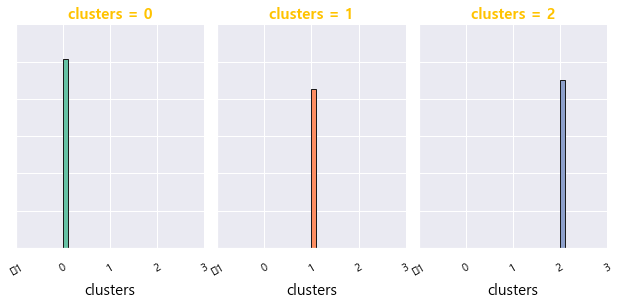

In [3321]:
# Clusters 변수별 해석
sns.set(rc={'font.family':'Malgun Gothic'})
for i in df_kp_x:
    g = sns.FacetGrid(df_kp_x, col = "clusters", hue = "clusters", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'black')
    g.set_yticklabels(color = 'black')
    g.set_xlabels(size=15, color = 'black')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5)

In [3322]:
#실루엣 계수 확인
from sklearn.metrics import silhouette_score
 
silhouette_score(df_kp_x, clusters_kp_random, metric='euclidean')

0.48826158507505957

**2. init='Cao', k=3** 

In [3323]:
df_kp_cao_x=df_kp_x.copy()
df_kp_cao_x

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드,clusters
0,3,1,182,98,23,0,0,2
1,2,1,115,130,33,0,0,2
2,3,5,313,181,33,0,0,2
3,3,1,464,165,50,0,0,0
4,9,1,601,136,52,0,1,0
...,...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0,2
1378,1,2,402,53,108,0,0,0
1379,3,2,111,149,36,0,0,2
1380,9,2,227,149,65,0,0,2


In [3324]:
#df_kp_x의 clusters 드랍하기
df_kp_cao_x.drop('clusters', axis=1, inplace=True)

In [3325]:
df_kp_cao_x

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드
0,3,1,182,98,23,0,0
1,2,1,115,130,33,0,0
2,3,5,313,181,33,0,0
3,3,1,464,165,50,0,0
4,9,1,601,136,52,0,1
...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0
1378,1,2,402,53,108,0,0
1379,3,2,111,149,36,0,0
1380,9,2,227,149,65,0,0


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 103

Run: 3, iteration: 2/100, moves: 67, ncost: 15879956.913334012
Run: 3, iteration: 3/100, moves: 24, ncost: 15856260.639431749
Run: 3, iteration: 4/100, moves: 9, ncost: 15851739.260331746
Run: 3, iteration: 5/100, moves: 7, ncost: 15847349.871284174
Run: 3, iteration: 6/100, moves: 3, ncost: 15845954.898295222
Run: 3, iteration: 7/100, moves: 11, ncost: 15837672.85648541
Run: 3, iteration: 8/100, moves: 7, ncost: 15833336.257831065
Run: 3, iteration: 9/100, moves: 0, ncost: 15833336.257831065
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 373, ncost: 17120151.705356944
Run: 4, iteration: 2/100, moves: 149, ncost: 16106965.763734424
Run: 4, iteration: 3/100, moves: 61, ncost: 15947720.133637035
Run: 4, iteration: 4/100, moves: 22, ncost: 15926743.520483514
Run: 4, iteration: 5/100, moves: 5, ncost: 15925025.289544284
Run: 4, iteration: 6/100, moves: 1, ncost: 15924783.405474141
Run: 4, iteration: 7/100, moves: 2, ncost: 1

Run: 1, iteration: 10/100, moves: 5, ncost: 11015306.800251454
Run: 1, iteration: 11/100, moves: 1, ncost: 11015171.569164585
Run: 1, iteration: 12/100, moves: 4, ncost: 11011976.143611915
Run: 1, iteration: 13/100, moves: 11, ncost: 11007390.706199534
Run: 1, iteration: 14/100, moves: 6, ncost: 11005578.616460806
Run: 1, iteration: 15/100, moves: 13, ncost: 11000619.60177718
Run: 1, iteration: 16/100, moves: 6, ncost: 10999212.328561513
Run: 1, iteration: 17/100, moves: 0, ncost: 10999212.328561513
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 297, ncost: 13587739.136338156
Run: 2, iteration: 2/100, moves: 185, ncost: 11929078.439401163
Run: 2, iteration: 3/100, moves: 110, ncost: 11374577.339690082
Run: 2, iteration: 4/100, moves: 55, ncost: 11263318.179274926
Run: 2, iteration: 5/100, moves: 37, ncost: 11208807.082451817
Run: 2, iteration: 6/100, moves: 24, ncost: 11184456.600809166
Run: 2, iteration: 7/100, moves: 1

Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 441, ncost: 11244117.215585023
Run: 4, iteration: 2/100, moves: 155, ncost: 10570707.470695958
Run: 4, iteration: 3/100, moves: 99, ncost: 10279885.914394356
Run: 4, iteration: 4/100, moves: 101, ncost: 9996781.387952438
Run: 4, iteration: 5/100, moves: 67, ncost: 9820823.397335917
Run: 4, iteration: 6/100, moves: 60, ncost: 9718250.881344847
Run: 4, iteration: 7/100, moves: 33, ncost: 9686719.999767063
Run: 4, iteration: 8/100, moves: 28, ncost: 9661018.997409804
Run: 4, iteration: 9/100, moves: 22, ncost: 9646469.89382784
Run: 4, iteration: 10/100, moves: 16, ncost: 9639086.100083528
Run: 4, iteration: 11/100, moves: 11, ncost: 9634844.371068412
Run: 4, iteration: 12/100, moves: 7, ncost: 9632390.006396191
Run: 4, iteration: 13/100, moves: 6, ncost: 9630723.390292708
Run: 4, iteration: 14/100, moves: 2, ncost: 9630337.210456643
Run: 4, iteration: 15/100, moves: 3, ncost: 9629860.234612286
Run: 4, iter

Run: 5, iteration: 11/100, moves: 2, ncost: 8766474.55452735
Run: 5, iteration: 12/100, moves: 3, ncost: 8765051.537044961
Run: 5, iteration: 13/100, moves: 6, ncost: 8760780.056872185
Run: 5, iteration: 14/100, moves: 6, ncost: 8759679.608914612
Run: 5, iteration: 15/100, moves: 0, ncost: 8759679.608914612
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 241, ncost: 8772794.55978574
Run: 1, iteration: 2/100, moves: 156, ncost: 8232961.181293294
Run: 1, iteration: 3/100, moves: 92, ncost: 7991397.469655264
Run: 1, iteration: 4/100, moves: 84, ncost: 7803621.502401069
Run: 1, iteration: 5/100, moves: 51, ncost: 7742225.760036801
Run: 1, iteration: 6/100, moves: 45, ncost: 7685935.104463138
Run: 1, iteration: 7/100, 

Run: 2, iteration: 11/100, moves: 13, ncost: 6862566.367875043
Run: 2, iteration: 12/100, moves: 9, ncost: 6859392.467784266
Run: 2, iteration: 13/100, moves: 7, ncost: 6853318.756577866
Run: 2, iteration: 14/100, moves: 0, ncost: 6853318.756577866
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 285, ncost: 7751495.053494675
Run: 3, iteration: 2/100, moves: 104, ncost: 7585319.55178391
Run: 3, iteration: 3/100, moves: 50, ncost: 7520561.485643947
Run: 3, iteration: 4/100, moves: 37, ncost: 7488344.914806433
Run: 3, iteration: 5/100, moves: 25, ncost: 7473219.079650659
Run: 3, iteration: 6/100, moves: 22, ncost: 7460321.267258113
Run: 3, iteration: 7/100, moves: 13, ncost: 7453227.231781157
Run: 3, iteration: 8/100, moves: 4, ncost: 7452602.750081568
Run: 3, iteration: 9/100, moves: 0, ncost: 7452602.750081568
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters


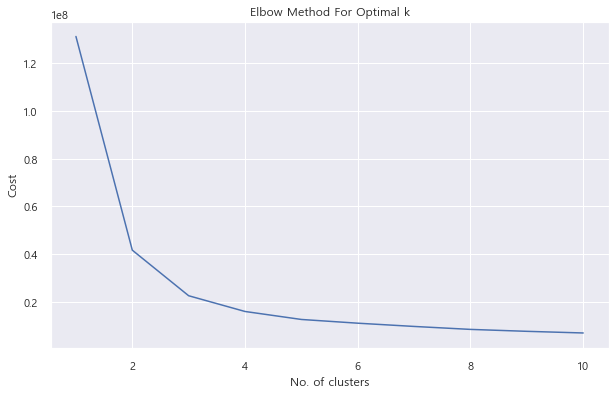

In [3326]:
# Elbow Method -> 최적의 k값 찾기
cost = []
K = range(1,11)
for num_clusters in list(K):
    kp= KPrototypes(n_clusters=num_clusters, init = "Cao", n_init = 5, verbose=1, random_state=42)
    kp.fit_predict(df_kp_cao_x, categorical=[0,1,6])
    cost.append(kp.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [3330]:
#모델 학습
kp_cao = KPrototypes(n_clusters=3, init = "Cao", n_init = 5, verbose=1, random_state=42)
clusters_kp_cao = kp_cao.fit_predict(df_kp_cao_x, categorical=[0,1,6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 151, ncost: 23234875.820775844
Run: 1, iteration: 2/100, moves: 82, ncost: 22619125.416560166
Run: 1, iteration: 3/100, moves: 40, ncost: 22501124.502855044
Run: 1, iteration: 4/100, moves: 18, ncost: 22474660.49954642
Run: 1, iteration: 5/100, moves: 9, ncost: 22462018.248347506
Run: 1, iteration: 6/100, moves: 13, ncost: 22445071.131012574
Run: 1, iteration: 7/100, moves: 3, ncost: 22443200.842390135
Run: 1, iteration: 8/100, moves: 1, ncost: 22442733.16387941
Run: 1, iteration: 9/100, moves: 1, ncost: 22442507.355093047
Run: 1, iteration: 10/100, moves: 0, ncost: 22442507.355093047
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 161, ncost: 24879883.38295602
Run: 2, iteration: 2/100, moves: 134, ncost: 23272147.906120386
Run: 2, iter

In [3331]:
#cost 확인
kp_cao.cost_

22439489.00445194

In [3332]:
df_kp_cao_x

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드
0,3,1,182,98,23,0,0
1,2,1,115,130,33,0,0
2,3,5,313,181,33,0,0
3,3,1,464,165,50,0,0
4,9,1,601,136,52,0,1
...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0
1378,1,2,402,53,108,0,0
1379,3,2,111,149,36,0,0
1380,9,2,227,149,65,0,0


In [3333]:
#clusters 컬럼 추가
df_kp_cao_x.insert(7, 'clusters', clusters_kp_cao)

In [3334]:
df_kp_cao_x

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드,clusters
0,3,1,182,98,23,0,0,1
1,2,1,115,130,33,0,0,1
2,3,5,313,181,33,0,0,1
3,3,1,464,165,50,0,0,2
4,9,1,601,136,52,0,1,2
...,...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0,1
1378,1,2,402,53,108,0,0,2
1379,3,2,111,149,36,0,0,1
1380,9,2,227,149,65,0,0,1


In [3335]:
#중심점 확인
kp_cao.cluster_centroids_

array([[8.81309859e+02, 5.72394366e+01, 1.32255869e+02, 1.70187793e+00,
        9.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.89942222e+02, 1.60782222e+02, 4.27244444e+01, 4.15555556e-01,
        1.20000000e+01, 1.00000000e+00, 0.00000000e+00],
       [5.17274704e+02, 1.12310277e+02, 7.12470356e+01, 1.90316206e+00,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [3336]:
#2차원 평면에 클러스터링을 표현하기 위해 차원 축소 : t-SNE 임베딩 사용
#2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(df_kp_cao_x)

# numpy array -> DataFrame 변환
df_tsne6 = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])

C:\Users\wlsna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\wlsna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


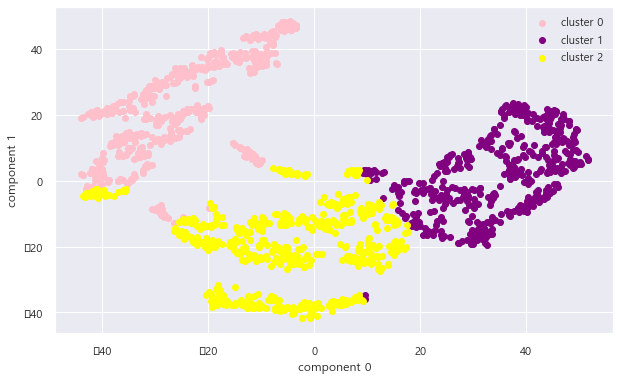

In [3337]:
# class 정보 불러오기 
df_tsne['class']=df_kp_cao_x['clusters']

# class별 분리
df_tsne0 = df_tsne[df_tsne['class'] == 0]
df_tsne1 = df_tsne[df_tsne['class'] == 1]
df_tsne2 = df_tsne[df_tsne['class'] == 2]

# class별 시각화
plt.scatter(df_tsne0['component 0'], df_tsne0['component 1'], color = 'pink', label = 'cluster 0')
plt.scatter(df_tsne1['component 0'], df_tsne1['component 1'], color = 'purple', label = 'cluster 1')
plt.scatter(df_tsne2['component 0'], df_tsne2['component 1'], color = 'yellow', label = 'cluster 2')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [3338]:
df_kp_cao_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   외장             1382 non-null   int32 
 1   연료             1382 non-null   int32 
 2   scaled_가격log   1382 non-null   int64 
 3   scaled_연비      1382 non-null   int64 
 4   scaled_배기량     1382 non-null   int64 
 5   scaled_충전주행거리  1382 non-null   int64 
 6   프리미엄 브랜드       1382 non-null   int64 
 7   clusters       1382 non-null   uint16
dtypes: int32(2), int64(5), uint16(1)
memory usage: 67.6 KB


In [3339]:
#카테고리로 데이터타입 변환
df_kp_cao_x['clusters']=df_kp_cao_x['clusters'].astype('category')

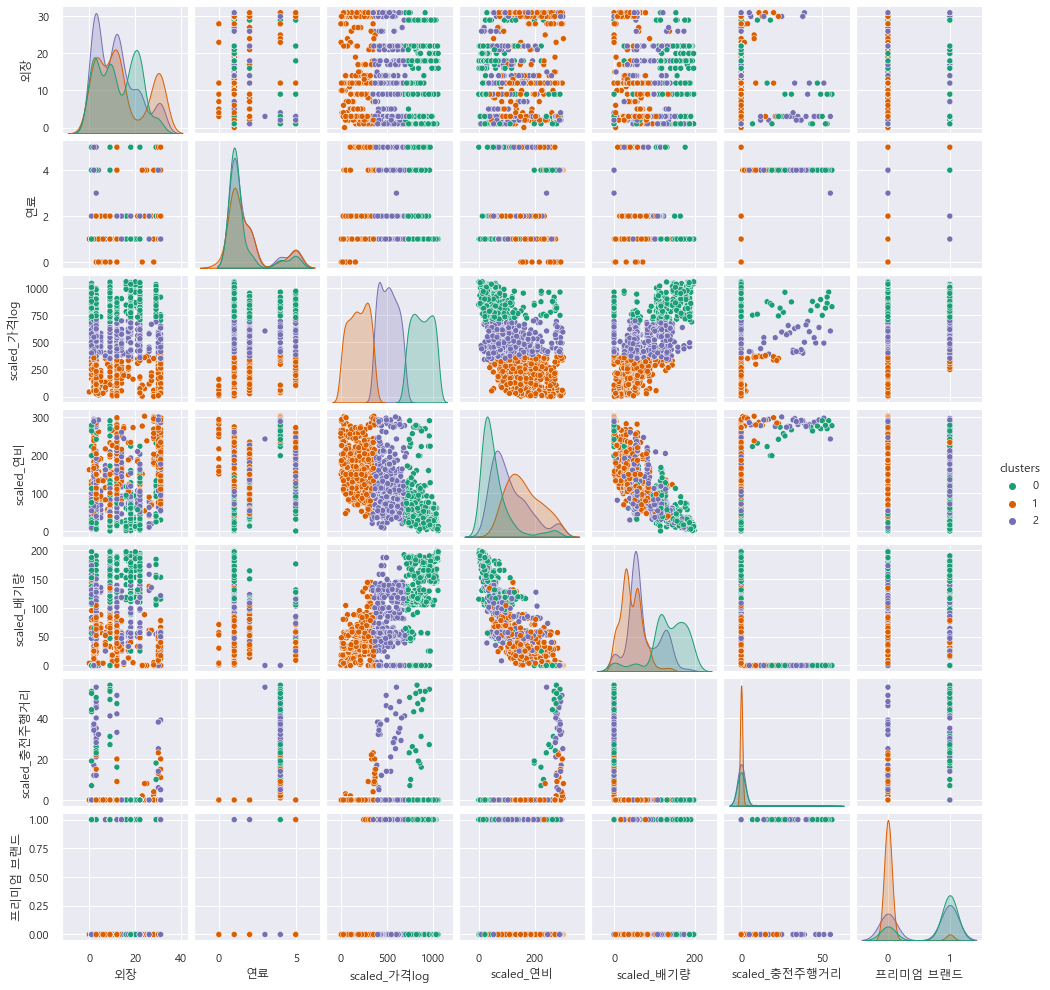

In [3340]:
#변수별 시각화
sns.pairplot(df_kp_cao_x, height=2.0, hue='clusters', palette='Dark2')
plt.show()

C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


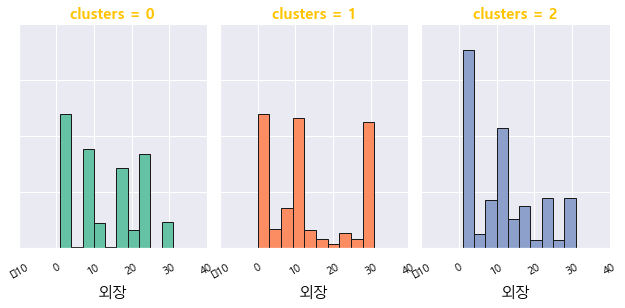

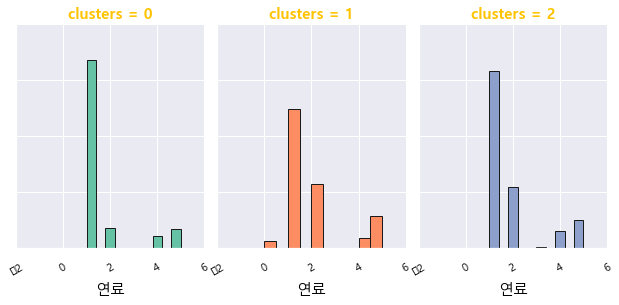

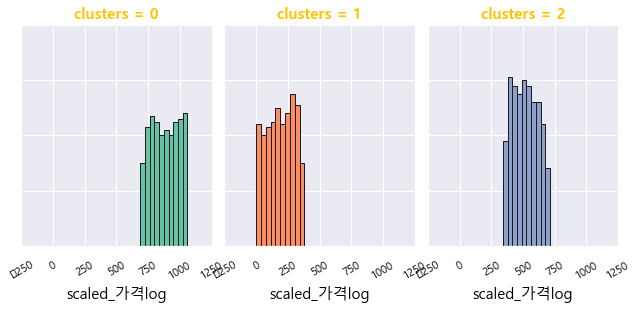

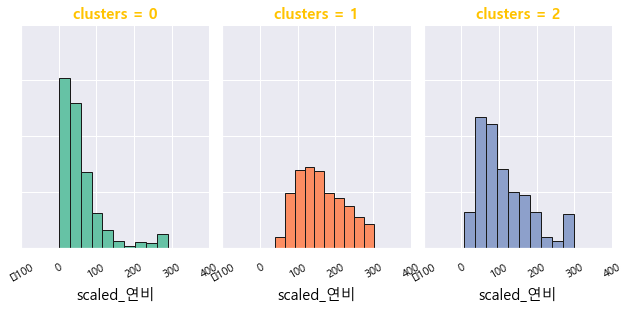

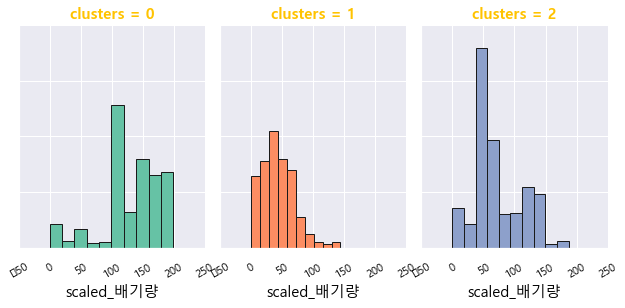

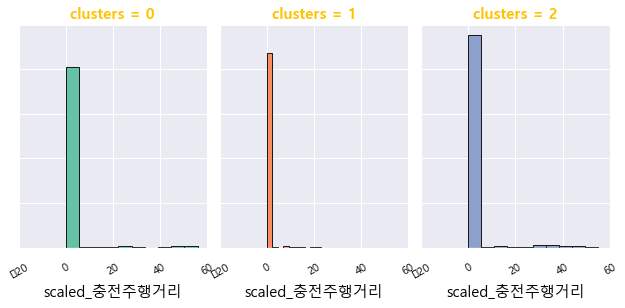

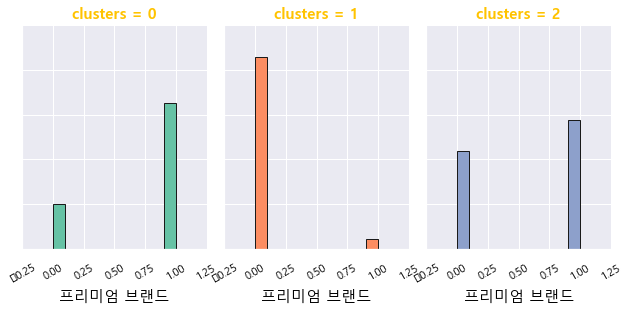

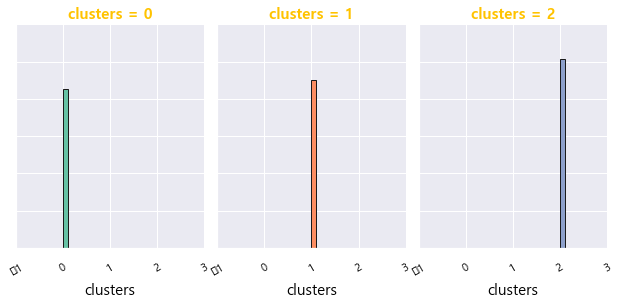

In [3341]:
# Clusters 변수별 해석
sns.set(rc={'font.family':'Malgun Gothic'})
for i in df_kp_cao_x:
    g = sns.FacetGrid(df_kp_cao_x, col = "clusters", hue = "clusters", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'black')
    g.set_yticklabels(color = 'black')
    g.set_xlabels(size=15, color = 'black')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5)

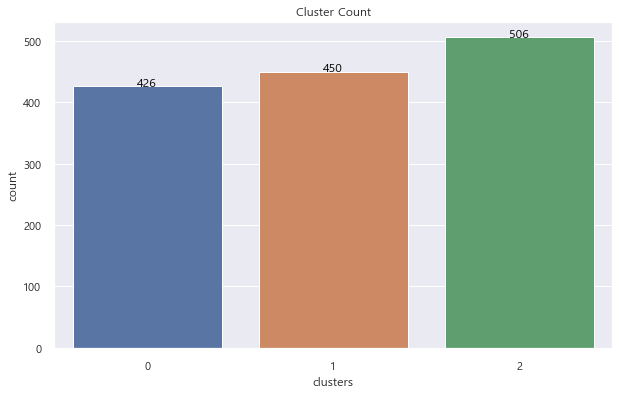

In [3342]:
#클러스터별 개수 count
ax=sns.countplot(x=df_kp_cao_x['clusters'])
for index, row in pd.DataFrame(df_kp_cao_x['clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])), color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [3343]:
#실루엣 계수 확인
from sklearn.metrics import silhouette_score
silhouette_score(df_kp_cao_x, clusters_kp_cao, metric='euclidean')

0.4882592546873093

**3. init='Haung', k=3** 

In [3344]:
df_kp_h=df_kp_x.copy()

In [3345]:
df_kp_h

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드,clusters
0,3,1,182,98,23,0,0,2
1,2,1,115,130,33,0,0,2
2,3,5,313,181,33,0,0,2
3,3,1,464,165,50,0,0,0
4,9,1,601,136,52,0,1,0
...,...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0,2
1378,1,2,402,53,108,0,0,0
1379,3,2,111,149,36,0,0,2
1380,9,2,227,149,65,0,0,2


In [3346]:
#df_kp_x의 clusters 드랍
df_kp_h.drop('clusters', axis=1, inplace=True)

In [3347]:
df_kp_h

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드
0,3,1,182,98,23,0,0
1,2,1,115,130,33,0,0
2,3,5,313,181,33,0,0
3,3,1,464,165,50,0,0
4,9,1,601,136,52,0,1
...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0
1378,1,2,402,53,108,0,0
1379,3,2,111,149,36,0,0
1380,9,2,227,149,65,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 131285256.18186095
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 24, ncost: 41573412.54461806
Run: 1, iteration: 2/100, moves: 1, ncost: 41573209.84943766
Run: 1, iteration: 3/100, moves: 0, ncost: 41573209.84943766
Init

Run: 3, iteration: 6/100, moves: 11, ncost: 15837672.85648541
Run: 3, iteration: 7/100, moves: 7, ncost: 15833336.257831065
Run: 3, iteration: 8/100, moves: 0, ncost: 15833336.257831065
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 180, ncost: 19075776.158629168
Run: 4, iteration: 2/100, moves: 196, ncost: 17235734.635796886
Run: 4, iteration: 3/100, moves: 102, ncost: 16524966.487171642
Run: 4, iteration: 4/100, moves: 54, ncost: 16316415.443942841
Run: 4, iteration: 5/100, moves: 37, ncost: 16237318.313388644
Run: 4, iteration: 6/100, moves: 23, ncost: 16203278.963044422
Run: 4, iteration: 7/100, moves: 34, ncost: 16118930.147800274
Run: 4, iteration: 8/100, moves: 36, ncost: 16041612.200535465
Run: 4, iteration: 9/100, moves: 43, ncost: 15950838.603037803
Run: 4, iteration: 10/100, moves: 18, ncost: 15934304.444097273
Run: 4, iteration: 11/100, moves: 10, ncost: 15927836.986552764
Run: 4, iteration: 12/100, moves: 1,

Run: 3, iteration: 18/100, moves: 1, ncost: 10966203.159668194
Run: 3, iteration: 19/100, moves: 0, ncost: 10966203.159668194
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 265, ncost: 11272343.79979651
Run: 4, iteration: 2/100, moves: 101, ncost: 11055619.176484205
Run: 4, iteration: 3/100, moves: 42, ncost: 11017328.308295343
Run: 4, iteration: 4/100, moves: 14, ncost: 10997801.123086011
Run: 4, iteration: 5/100, moves: 14, ncost: 10988429.28681121
Run: 4, iteration: 6/100, moves: 6, ncost: 10986916.137125839
Run: 4, iteration: 7/100, moves: 5, ncost: 10982666.160572313
Run: 4, iteration: 8/100, moves: 1, ncost: 10982525.232935376
Run: 4, iteration: 9/100, moves: 1, ncost: 10982426.71675088
Run: 4, iteration: 10/100, moves: 0, ncost: 10982426.71675088
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 

Run: 1, iteration: 9/100, moves: 7, ncost: 8333835.851832856
Run: 1, iteration: 10/100, moves: 6, ncost: 8329702.854269096
Run: 1, iteration: 11/100, moves: 5, ncost: 8327883.369900928
Run: 1, iteration: 12/100, moves: 9, ncost: 8322754.836918837
Run: 1, iteration: 13/100, moves: 2, ncost: 8322473.232449522
Run: 1, iteration: 14/100, moves: 0, ncost: 8322473.232449522
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 245, ncost: 9657125.709374946
Run: 2, iteration: 2/100, moves: 146, ncost: 9098039.030461954
Run: 2, iteration: 3/100, moves: 102, ncost: 8841980.442319179
Run: 2, iteration: 4/100, moves: 56, ncost: 8761021.852565443
Run: 2, iteration: 5/100, moves: 43, ncost: 8717688.429187726
Run: 2, iteration: 6/100, moves: 38, ncost: 8644756.441947518
Run: 2, iteration: 7/100, moves: 40, ncost: 8579517.284224099
Run: 2, iteration: 8/100, moves: 36, ncost: 8516559.61481888
Run: 2, iteration: 9/100, moves: 49, ncost: 8406149

Run: 5, iteration: 18/100, moves: 0, ncost: 8898249.571331784
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 339, ncost: 8720074.641279329
Run: 1, iteration: 2/100, moves: 118, ncost: 8489317.68109782
Run: 1, iteration: 3/100, moves: 65, ncost: 8404423.556619927
Run: 1, iteration: 4/100, moves: 45, ncost: 8343232.3116143625
Run: 1, iteration: 5/100, moves: 31, ncost: 8296141.115301723
Run: 1, iteration: 6/100, moves: 46, ncost: 8123053.0308770565
Run: 1, iteration: 7/100, moves: 74, ncost: 7737538.471364782
Run: 1, iteration: 8/100, moves: 50, ncost: 7517808.188621075
Run: 1, iteration: 9/100, moves: 22, ncost: 7500963.342400576
Run: 1, iteration: 10/100, moves: 15, ncost: 7492908.393352129
Run: 1, iteration: 11/100, moves: 7, ncost: 7490738.405562087
Run: 1, iteration: 12/100, moves: 3, ncost: 7490333.959382646
Run: 1, iteration: 13/100, moves: 3, ncost: 7489784.740008071
Run: 1, iteration: 14/100,

Run: 3, iteration: 6/100, moves: 41, ncost: 7093783.93403032
Run: 3, iteration: 7/100, moves: 29, ncost: 7067594.853997161
Run: 3, iteration: 8/100, moves: 25, ncost: 7046575.879147927
Run: 3, iteration: 9/100, moves: 25, ncost: 7018651.602117812
Run: 3, iteration: 10/100, moves: 16, ncost: 7002839.61298133
Run: 3, iteration: 11/100, moves: 19, ncost: 6985597.8053319
Run: 3, iteration: 12/100, moves: 22, ncost: 6970166.917221923
Run: 3, iteration: 13/100, moves: 20, ncost: 6954436.33195814
Run: 3, iteration: 14/100, moves: 18, ncost: 6946204.7067810055
Run: 3, iteration: 15/100, moves: 23, ncost: 6927435.792167769
Run: 3, iteration: 16/100, moves: 23, ncost: 6902978.279025528
Run: 3, iteration: 17/100, moves: 30, ncost: 6879757.564340578
Run: 3, iteration: 18/100, moves: 22, ncost: 6865178.116947742
Run: 3, iteration: 19/100, moves: 25, ncost: 6851442.795153134
Run: 3, iteration: 20/100, moves: 22, ncost: 6840471.946070169
Run: 3, iteration: 21/100, moves: 9, ncost: 6837282.3278591605


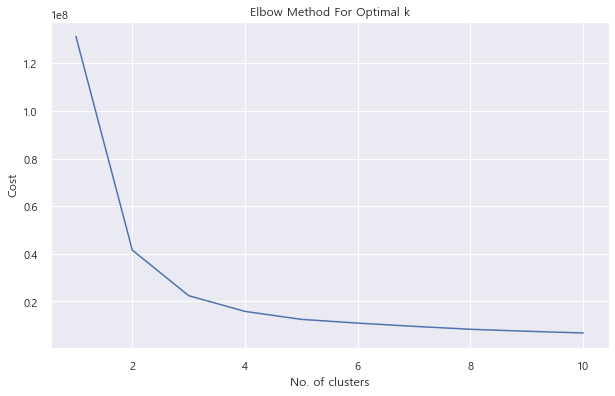

In [3348]:
# Elbow method -> 최적의 k값 찾기
cost = []
K = range(1,11)
for num_clusters in list(K):
    kp= KPrototypes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=1, random_state=42)
    kp.fit_predict(df_kp_h, categorical=[0,1,6])
    cost.append(kp.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [3349]:
#모델 학습
kp_h = KPrototypes(n_clusters=3, init = "Huang", n_init = 5, verbose=1, random_state=42)
clusters_kp_h = kp_h.fit_predict(df_kp_h, categorical=[0,1,6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 176, ncost: 23768380.37461418
Run: 1, iteration: 2/100, moves: 106, ncost: 22751788.62309466
Run: 1, iteration: 3/100, moves: 47, ncost: 22539578.40974757
Run: 1, iteration: 4/100, moves: 21, ncost: 22496213.903172355
Run: 1, iteration: 5/100, moves: 17, ncost: 22472361.768669188
Run: 1, iteration: 6/100, moves: 17, ncost: 22447223.101264734
Run: 1, iteration: 7/100, moves: 6, ncost: 22443200.842390135
Run: 1, iteration: 8/100, moves: 1, ncost: 22442733.16387941
Run: 1, iteration: 9/100, moves: 1, ncost: 22442507.355093047
Run: 1, iteration: 10/100, moves: 0, ncost: 22442507.355093047
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 47, ncost: 22749349.724125586
Run: 2, iteration: 2/100, moves: 38, ncost: 22607561.425371807
Run: 2, iteration: 3/100, moves: 38, ncost: 22473854.32628581
Run: 2, iteration: 4/100, m

In [3350]:
#cost 확인
kp_h.cost_

22439489.00445194

In [3351]:
#clusters 컬럼 추가
df_kp_h.insert(7, 'clusters', clusters_kp_h)

In [3352]:
df_kp_h

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드,clusters
0,3,1,182,98,23,0,0,1
1,2,1,115,130,33,0,0,1
2,3,5,313,181,33,0,0,1
3,3,1,464,165,50,0,0,2
4,9,1,601,136,52,0,1,2
...,...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0,1
1378,1,2,402,53,108,0,0,2
1379,3,2,111,149,36,0,0,1
1380,9,2,227,149,65,0,0,1


In [3353]:
#2차원 평면에 클러스터링을 표현하기 위해 차원 축소 : t-SNE 임베딩 사용
#2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(df_kp_h)

# numpy array -> DataFrame 변환
df_tsne6 = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])

C:\Users\wlsna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\wlsna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


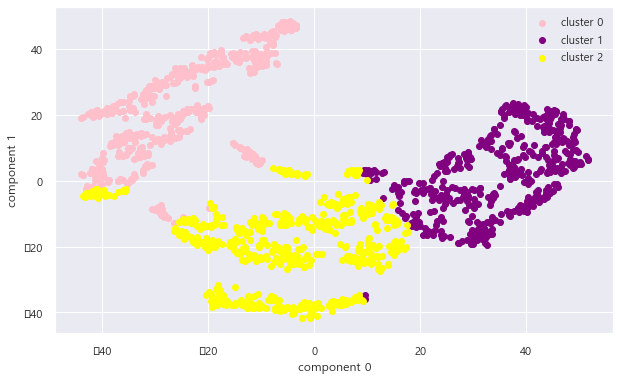

In [3354]:
# class 정보 불러오기 
df_tsne['class']=df_kp_h['clusters']

# class별 분리
df_tsne0 = df_tsne[df_tsne['class'] == 0]
df_tsne1 = df_tsne[df_tsne['class'] == 1]
df_tsne2 = df_tsne[df_tsne['class'] == 2]

# class별 시각화
plt.scatter(df_tsne0['component 0'], df_tsne0['component 1'], color = 'pink', label = 'cluster 0')
plt.scatter(df_tsne1['component 0'], df_tsne1['component 1'], color = 'purple', label = 'cluster 1')
plt.scatter(df_tsne2['component 0'], df_tsne2['component 1'], color = 'yellow', label = 'cluster 2')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

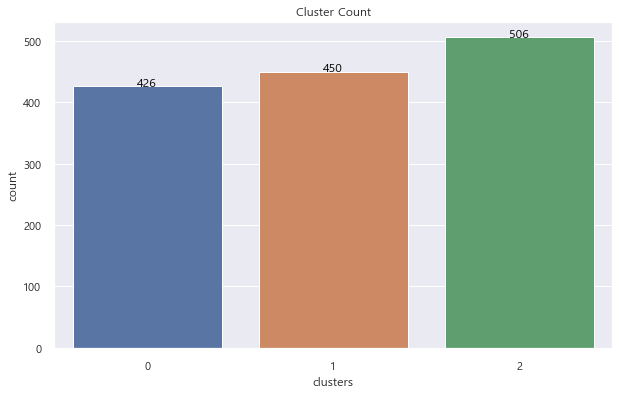

In [3355]:
#clusters 개수 count
ax=sns.countplot(x=df_kp_h['clusters'])
for index, row in pd.DataFrame(df_kp_h['clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])), color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [3356]:
df_kp_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   외장             1382 non-null   int32 
 1   연료             1382 non-null   int32 
 2   scaled_가격log   1382 non-null   int64 
 3   scaled_연비      1382 non-null   int64 
 4   scaled_배기량     1382 non-null   int64 
 5   scaled_충전주행거리  1382 non-null   int64 
 6   프리미엄 브랜드       1382 non-null   int64 
 7   clusters       1382 non-null   uint16
dtypes: int32(2), int64(5), uint16(1)
memory usage: 67.6 KB


In [3357]:
#카테고리로 데이터 타입 변환
df_kp_h['clusters']=df_kp_h['clusters'].astype('category')

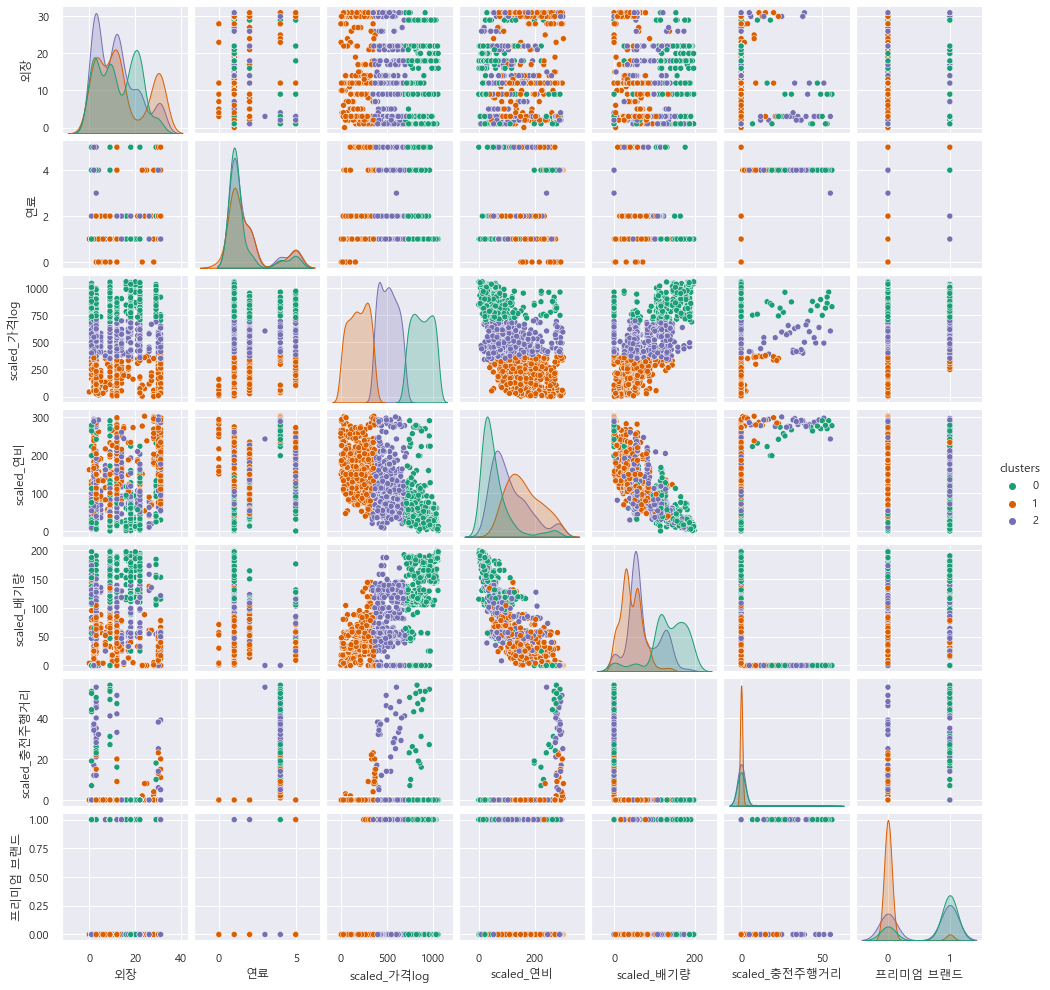

In [3358]:
#변수별 시각화
sns.pairplot(df_kp_h, height=2.0, hue='clusters', palette='Dark2')
plt.show()

C:\Users\wlsna\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


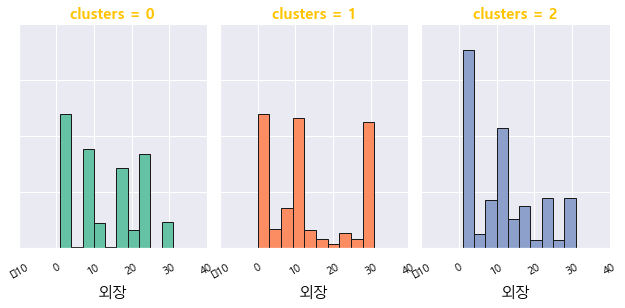

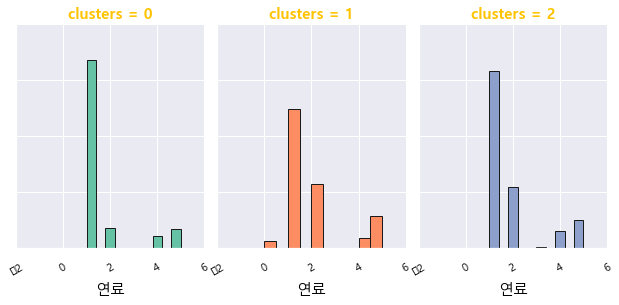

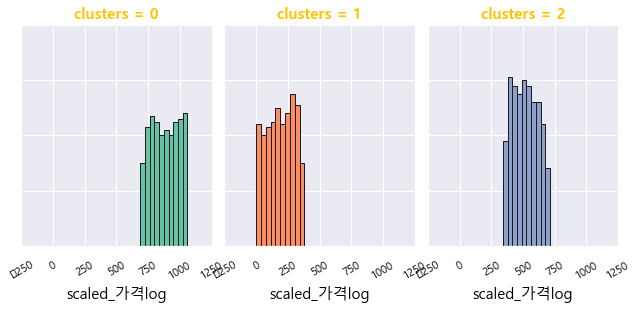

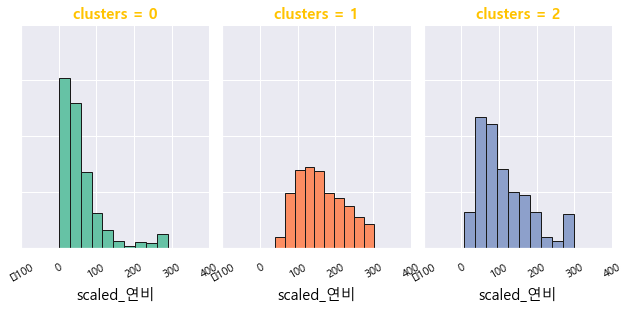

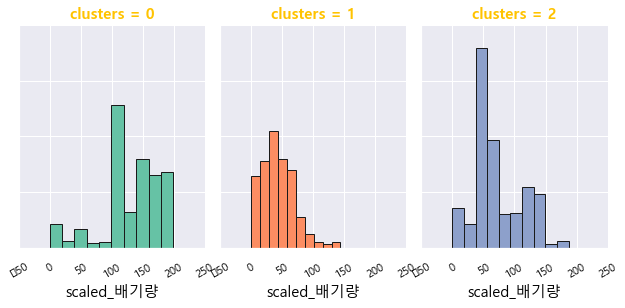

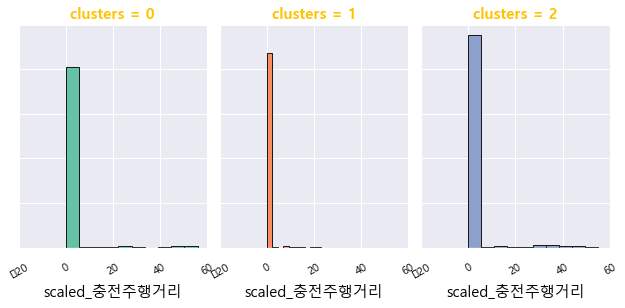

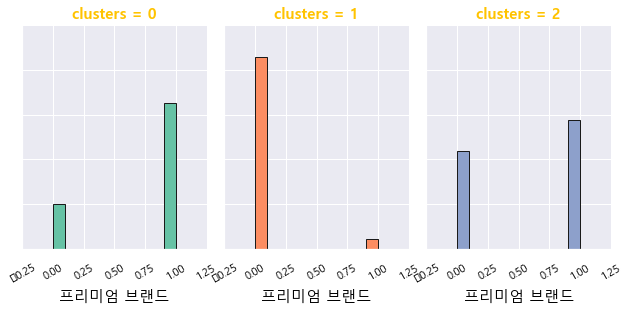

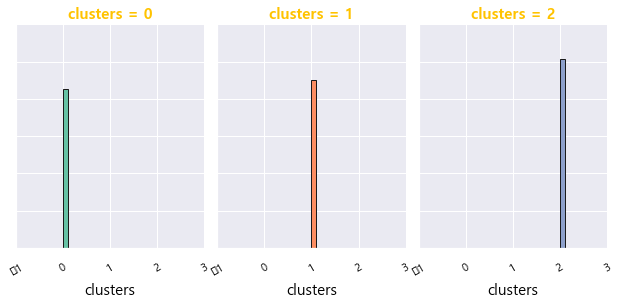

In [3359]:
#clusters 해석
sns.set(rc={'font.family':'Malgun Gothic'})
for i in df_kp_h:
    g = sns.FacetGrid(df_kp_h, col = "clusters", hue = "clusters", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'black')
    g.set_yticklabels(color = 'black')
    g.set_xlabels(size=15, color = 'black')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5)

In [3360]:
#실루엣 계수 확인
from sklearn.metrics import silhouette_score
 
silhouette_score(df_kp_h, clusters_kp_h, metric='euclidean')

0.4882592546873093

## 5. 최종 모델 선택 
- init='Cao', n_clusters=3으로 학습한 모델

In [3361]:
df_kp

,모델명,가격,외장,연료,제조 회사,프리미엄 브랜드,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리
0,쌍용 토레스 (1세대),2740,SUV (중형),가솔린,쌍용,0,0.308167,0.153932,0.221712,0.0
1,기아 셀토스 F/L (1세대),2160,SUV (소형),가솔린,기아,0,0.258660,0.184718,0.236671,0.0
2,기아 쏘렌토 하이브리드 (4세대),3745,SUV (중형),하이브리드,기아,0,0.373212,0.228182,0.236671,0.0
3,폭스바겐 티구안 올스페이스 (2세대),5098,SUV (중형),가솔린,폭스바겐,0,0.437421,0.213694,0.293839,0.0
4,벤츠 E클래스 세단 F/L (5세대),6730,세단 (대형),가솔린,벤츠,1,0.495243,0.190151,0.294876,0.0
...,...,...,...,...,...,...,...,...,...,...
1377,기아 레이 F/L (1세대),1275,밴 (소형),가솔린,기아,0,0.148955,0.186529,0.147808,0.0
1378,기아 모하비 F/L (1세대),4442,SUV (대형),디젤,기아,0,0.408745,0.113893,0.438241,0.0
1379,기아 스포티지 (4세대),2110,SUV (중형),디젤,기아,0,0.253785,0.201284,0.249556,0.0
1380,기아 K7 (2세대),3053,세단 (대형),디젤,기아,0,0.330683,0.201284,0.325681,0.0


In [3362]:
df_kp_cao_x

,외장,연료,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,프리미엄 브랜드,clusters
0,3,1,182,98,23,0,0,1
1,2,1,115,130,33,0,0,1
2,3,5,313,181,33,0,0,1
3,3,1,464,165,50,0,0,2
4,9,1,601,136,52,0,1,2
...,...,...,...,...,...,...,...,...
1377,6,1,30,132,4,0,0,1
1378,1,2,402,53,108,0,0,2
1379,3,2,111,149,36,0,0,1
1380,9,2,227,149,65,0,0,1


In [3363]:
#데이터 합치기
df_class=pd.concat([df_kp, df_kp_cao_x['clusters']], axis=1)

In [3364]:
df_class

,모델명,가격,외장,연료,제조 회사,프리미엄 브랜드,scaled_가격log,scaled_연비,scaled_배기량,scaled_충전주행거리,clusters
0,쌍용 토레스 (1세대),2740,SUV (중형),가솔린,쌍용,0,0.308167,0.153932,0.221712,0.0,1
1,기아 셀토스 F/L (1세대),2160,SUV (소형),가솔린,기아,0,0.258660,0.184718,0.236671,0.0,1
2,기아 쏘렌토 하이브리드 (4세대),3745,SUV (중형),하이브리드,기아,0,0.373212,0.228182,0.236671,0.0,1
3,폭스바겐 티구안 올스페이스 (2세대),5098,SUV (중형),가솔린,폭스바겐,0,0.437421,0.213694,0.293839,0.0,2
4,벤츠 E클래스 세단 F/L (5세대),6730,세단 (대형),가솔린,벤츠,1,0.495243,0.190151,0.294876,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1377,기아 레이 F/L (1세대),1275,밴 (소형),가솔린,기아,0,0.148955,0.186529,0.147808,0.0,1
1378,기아 모하비 F/L (1세대),4442,SUV (대형),디젤,기아,0,0.408745,0.113893,0.438241,0.0,2
1379,기아 스포티지 (4세대),2110,SUV (중형),디젤,기아,0,0.253785,0.201284,0.249556,0.0,1
1380,기아 K7 (2세대),3053,세단 (대형),디젤,기아,0,0.330683,0.201284,0.325681,0.0,1


In [3365]:
#데이터프레임 csv파일로 내보내기
df_class.to_csv('./data/clustering_final.csv', encoding='cp949', header=True, index=True)